# Extract the spectrum of CTIO Data  for  HD111980 data 09 jun 2017
==================================================================================================

- author : Sylvie Dagoret-Campagne and Jérémy Neveu
- date   : July 4th 2017
- update October 11th 2017


- The goal is to extract the spectrum after the rotation.


-1) First the 1 orders are extracted. One must check the rotation is correct

-2) Check the 2 orders are well aligned along X by looking at the transverse profile : if you see two peaks this means the rotation is bad.

-3) For this the central star light must having been turned off.

In [41]:
%%javascript
var kernel = IPython.notebook.kernel;
var thename = window.document.getElementById("notebook_name").innerHTML;
var command = "theNotebook = " + "'"+thename+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [42]:
print theNotebook

Extract_Spectrum


In [43]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

print theNotebook
from IPython.display import Image, display
import sys
sys.path.append("../../common_tools/")
from common_notebook import *

init_notebook()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Extract_Spectrum
ccdproc version 1.2.0
bottleneck version 1.2.1
/Users/dagoret/MacOSX/GitHub/LSST/CTIOAnaJun2017/ana_09jun17/HD111980


In [44]:
from matplotlib.backends.backend_pdf import PdfPages

In [45]:
import pandas as pd

# Initialization

## Input Directory

In [46]:
inputdir="./rotated_fitsimages"
MIN_IMGNUMBER=4
MAX_IMGNUMBER=20
#MAX_IMGNUMBER=28
date="20170609"
object_name='HD111980'
tag = "rotimg"
SelectTagRe='^%s_%s_([0-9]+).fits$' % (tag,date) # regular expression to select the file
SearchTagRe='^%s_%s_[0-9]+.fits$' % (tag,date)
NBIMGPERROW=2

## Output directory

In [47]:
dir_top_images="images_notebooks/"+theNotebook ### Top directory to save images
ensure_dir(dir_top_images) # create that directory

outputdir="./spectrum_fitsspec"
ensure_dir(outputdir)

# Open files

## Find where is order 0 in original raw image

- necessary for wavelength calibration

In [48]:
df=pd.read_csv('xy_pointing.csv')
x_star=df["x_pointing"]
y_star=df["y_pointing"]
all_theta=df["theta"]
x_pointing=x_star
y_pointing=y_star

In [49]:
order0_positions = np.array([x_pointing,y_pointing]).T

In [50]:
df.head()

,Unnamed: 0,theta,x_pointing,y_pointing
0,0,-0.511132,335.448097,343.053556
1,1,-0.339621,1007.084739,341.484256
2,2,-0.111469,1342.833047,341.122682
3,3,-0.312795,686.097705,676.418313
4,4,-0.165841,1342.206613,675.905141


## Find where is order 0 in the rotated image

In [51]:
df2=pd.read_csv('x_y_guess2.csv')
x_star2=df2["x_guess2"]
y_star2=df2["y_guess2"]
order0_positions2 = np.array([x_star2,y_star2]).T

In [52]:
df2.head()

,Unnamed: 0,theta,x_guess2,y_guess2
0,0,-0.511132,337.007714,202.901692
1,1,-0.339621,1008.079889,206.362541
2,2,-0.111469,1343.318721,202.724330
3,3,-0.312795,687.103584,204.049201
4,4,-0.165841,1342.702111,204.796056


## Open Fits images

In [53]:
sorted_numbers,sorted_files = MakeFileList([inputdir],MIN_IMGNUMBER,MAX_IMGNUMBER,SelectTagRe,SearchTagRe) 
all_dates,all_airmass,all_images,all_titles,all_header,all_expo,all_filt,all_filt1,all_filt2=BuildImages(sorted_files,sorted_numbers,object_name)

print 'Number of images:',len(all_images)
print all_images[0].shape

Number of images: 6
(400, 2048)


In [54]:
print all_filt

['FGB37 Ron400', 'FGB37 Ron400', 'FGB37 Ron400', 'FGB37 Ron400', 'FGB37 Ron400', 'FGB37 Ron400']


## Disperser sorting

In [55]:
filt0_idx,filt1_idx,filt2_idx,filt3_idx,filt4_idx,filt5_idx,filt6_idx=get_filt_idx(all_filt)

In [56]:
print  Filt_names[0],' \t : filt0_idx :: ',filt0_idx
print  Filt_names[1],' \t : filt1_idx :: ',filt1_idx
print  Filt_names[2],' \t : filt2_idx :: ',filt2_idx
print  Filt_names[3],' \t : filt3_idx :: ',filt3_idx
print  Filt_names[4],' \t : filt4_idx :: ',filt4_idx
print  Filt_names[5],' \t : filt5_idx :: ',filt5_idx
print  Filt_names[6],' \t : filt6_idx :: ',filt6_idx

dia Ron400  	 : filt0_idx ::  [0 1 2 3 4 5]
dia Thor300  	 : filt1_idx ::  []
dia HoloPhP  	 : filt2_idx ::  []
dia HoloPhAg  	 : filt3_idx ::  []
dia HoloAmAg  	 : filt4_idx ::  []
dia Ron200  	 : filt5_idx ::  []
Unknown  	 : filt6_idx ::  []


In [57]:
#all_dates,all_airmass,all_images,all_titles,all_header,all_expo,all_filt,all_filt1,all_filt2=BuildImages(sorted_files,sorted_numbers,object_name)

## Show images
-----------------------

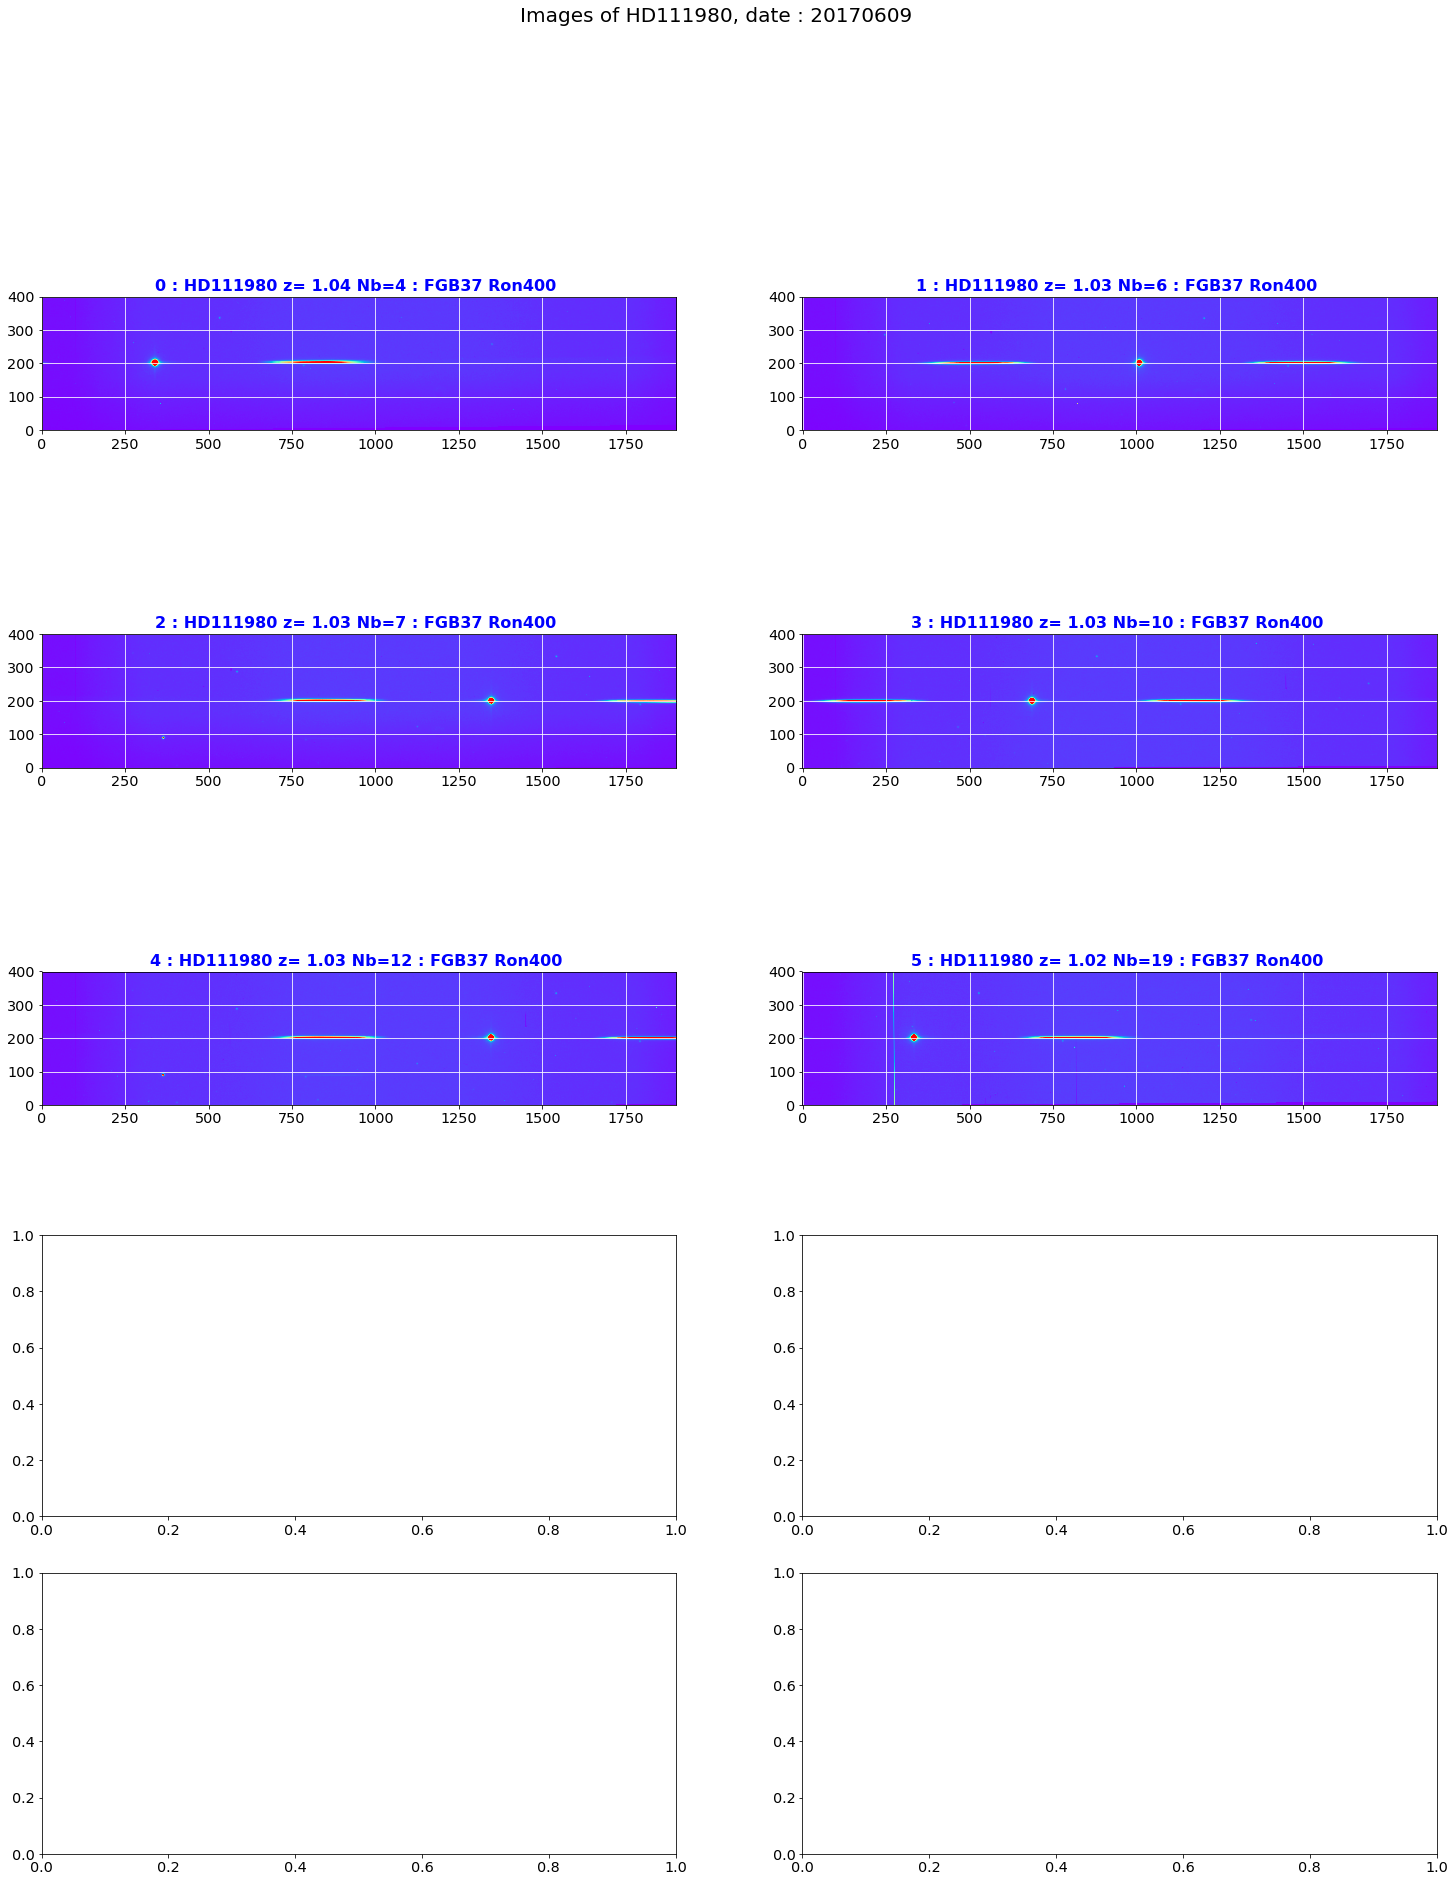

In [58]:
ShowImagesinPDF(all_images,all_titles,object_name,dir_top_images,all_filt,date)

# Find central star

- central star in the current image

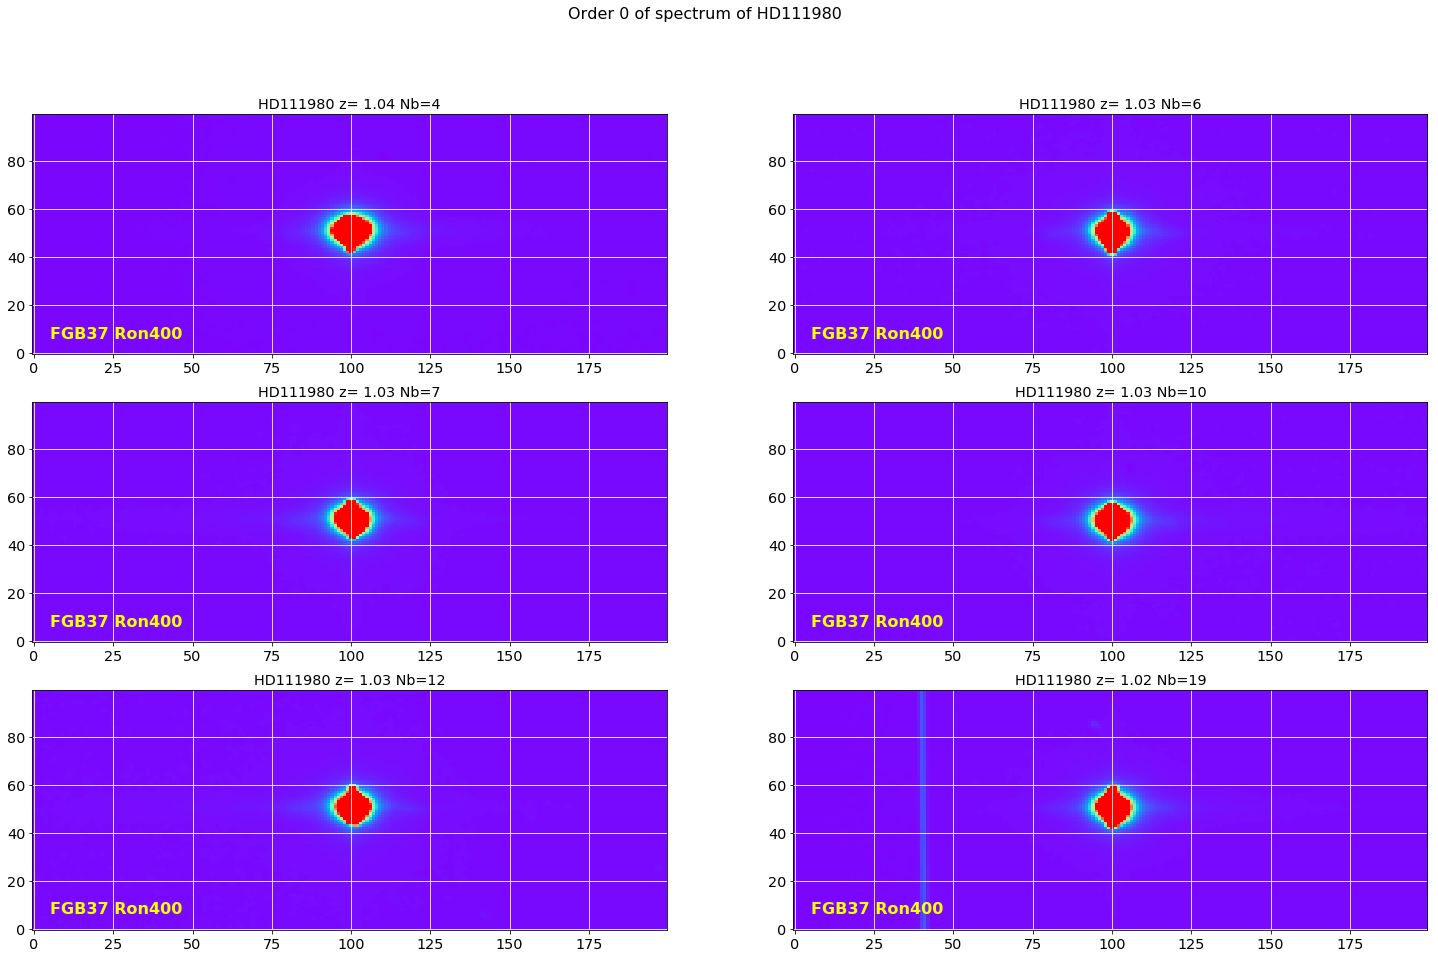

In [59]:
# Center : Order 0
#-------------------
# start at star
y_star0=[all_images[0].shape[0]/2]*len(all_images)
x_star0=x_star2
#ShowCenterImages([1300]*len(all_images),y_star0,[500]*len(all_images),[25]*len(all_images),
#                all_images,all_titles,all_filt,object_name,NBIMGPERROW=2,vmin=0,vmax=10000)
ShowCenterImages(x_star0,y_star0,[100]*len(all_images),[50]*len(all_images),
                 all_images,all_titles,all_filt,object_name,NBIMGPERROW=2,vmin=0,vmax=10000)

title='Order 0 of spectrum of {} '.format(object_name)
plt.suptitle(title,size=16)
figfilename=os.path.join(dir_top_images,'order0.pdf')
plt.savefig(figfilename)  

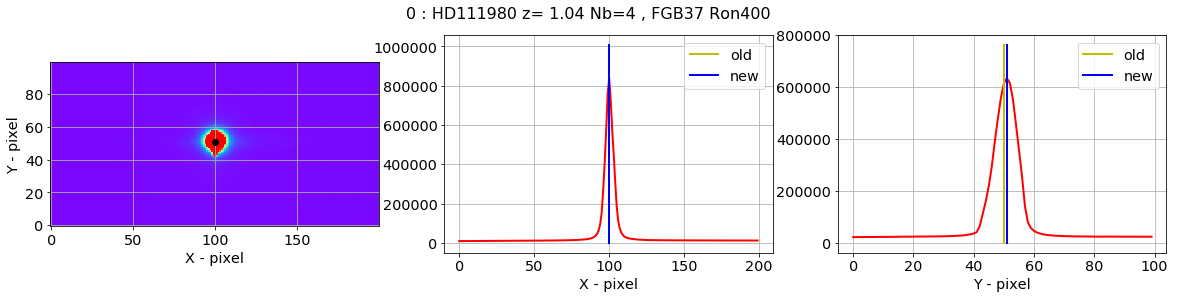

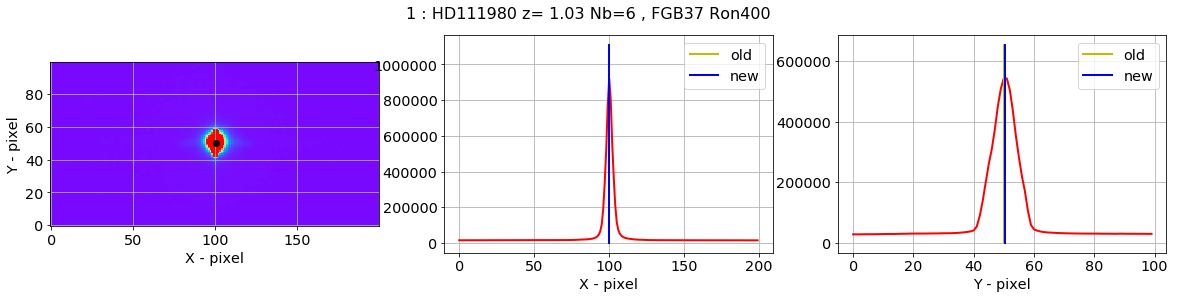

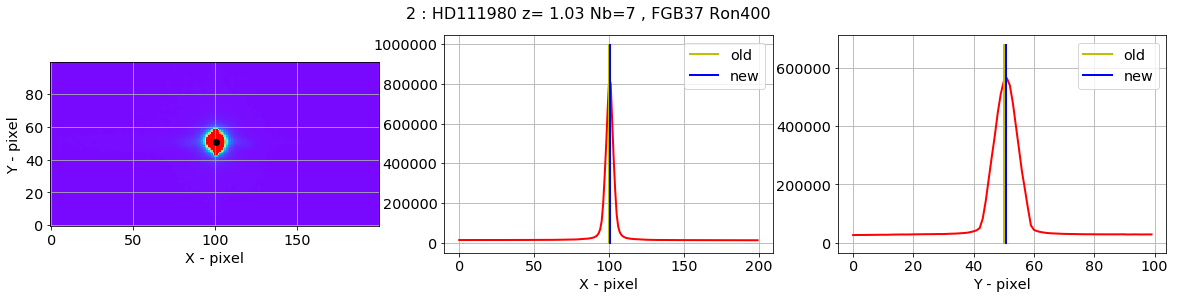

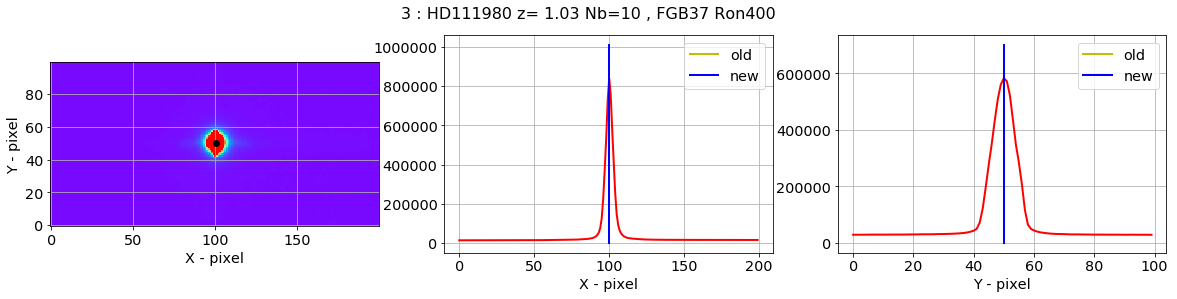

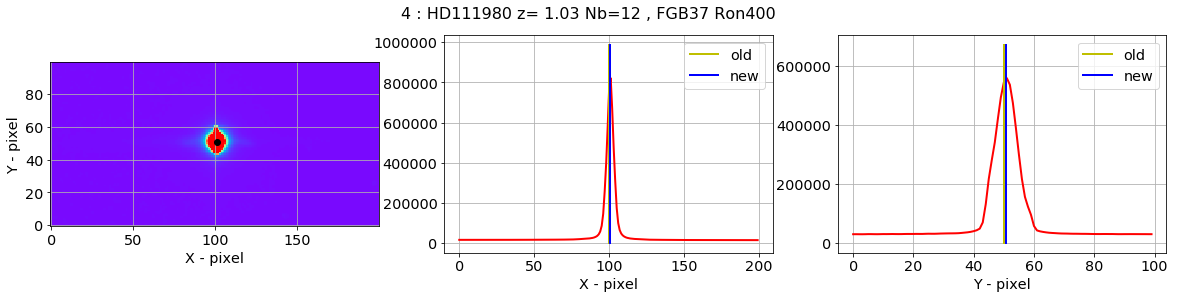

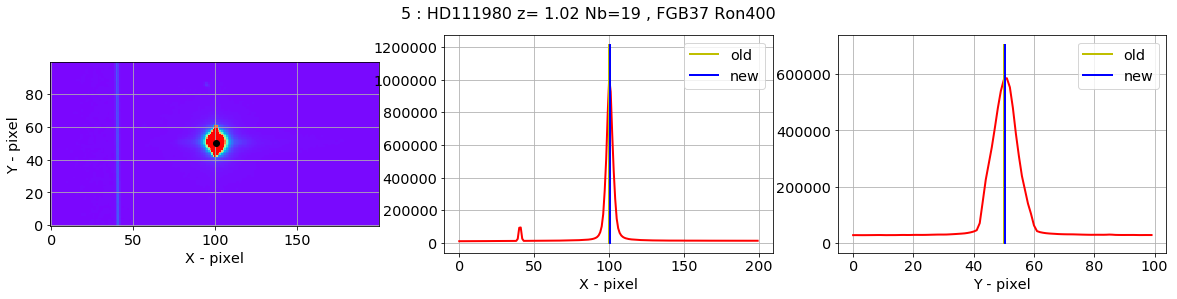

In [60]:
new_x_star,new_y_star=check_central_star(all_images,x_star2,y_star0,all_titles,all_filt)

Final pdf Page written  0


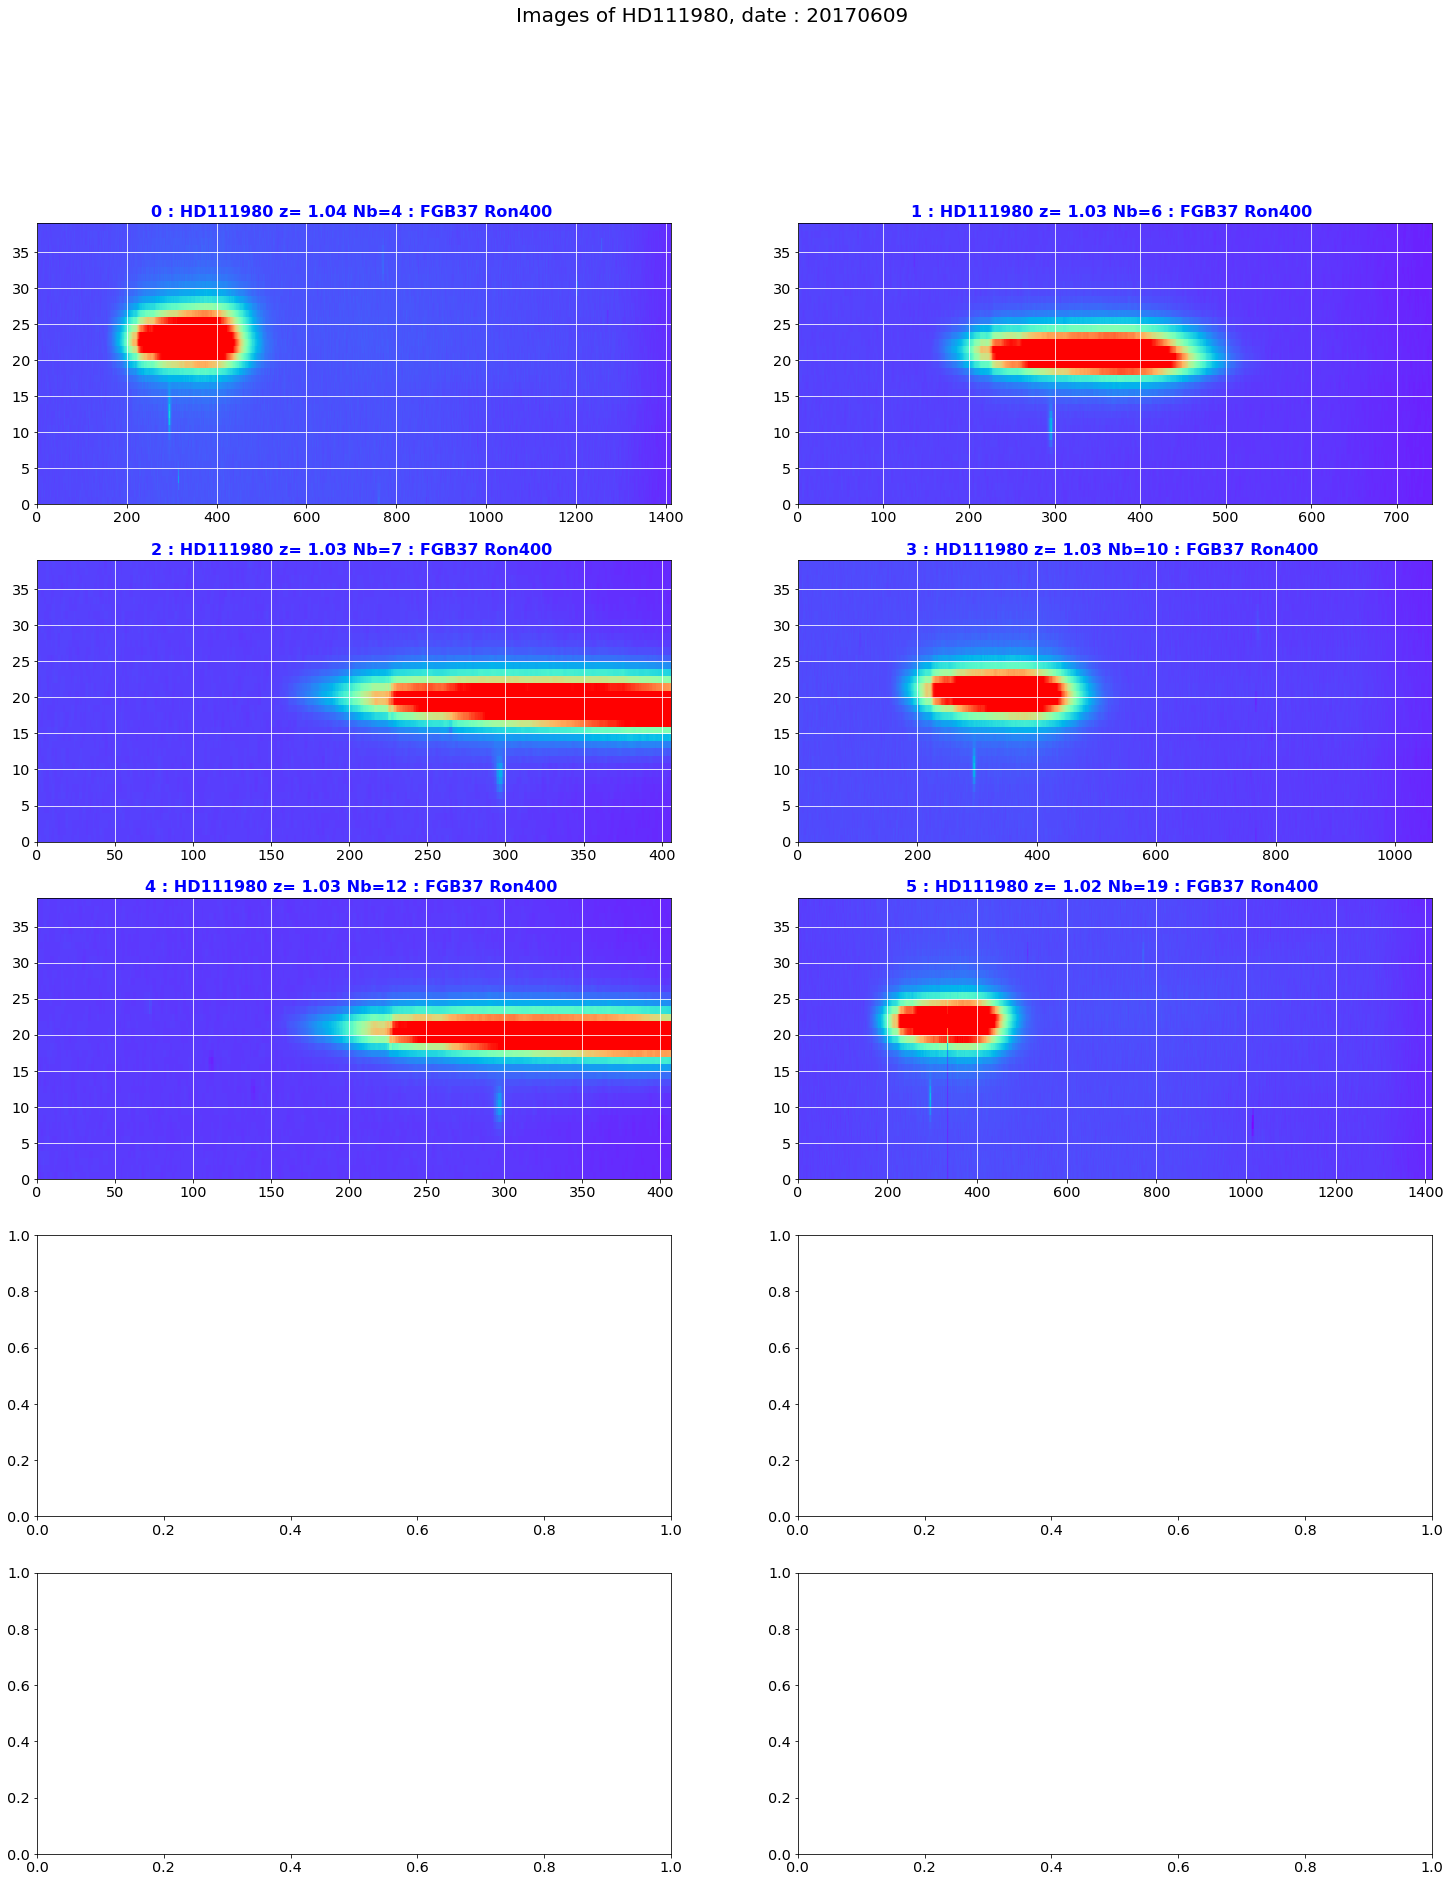

In [61]:
ShowOneOrderinPDF(all_images,all_titles,new_x_star,new_y_star,object_name,all_expo,dir_top_images,all_filt,date,'firstorderright.pdf')

Final pdf Page written  0


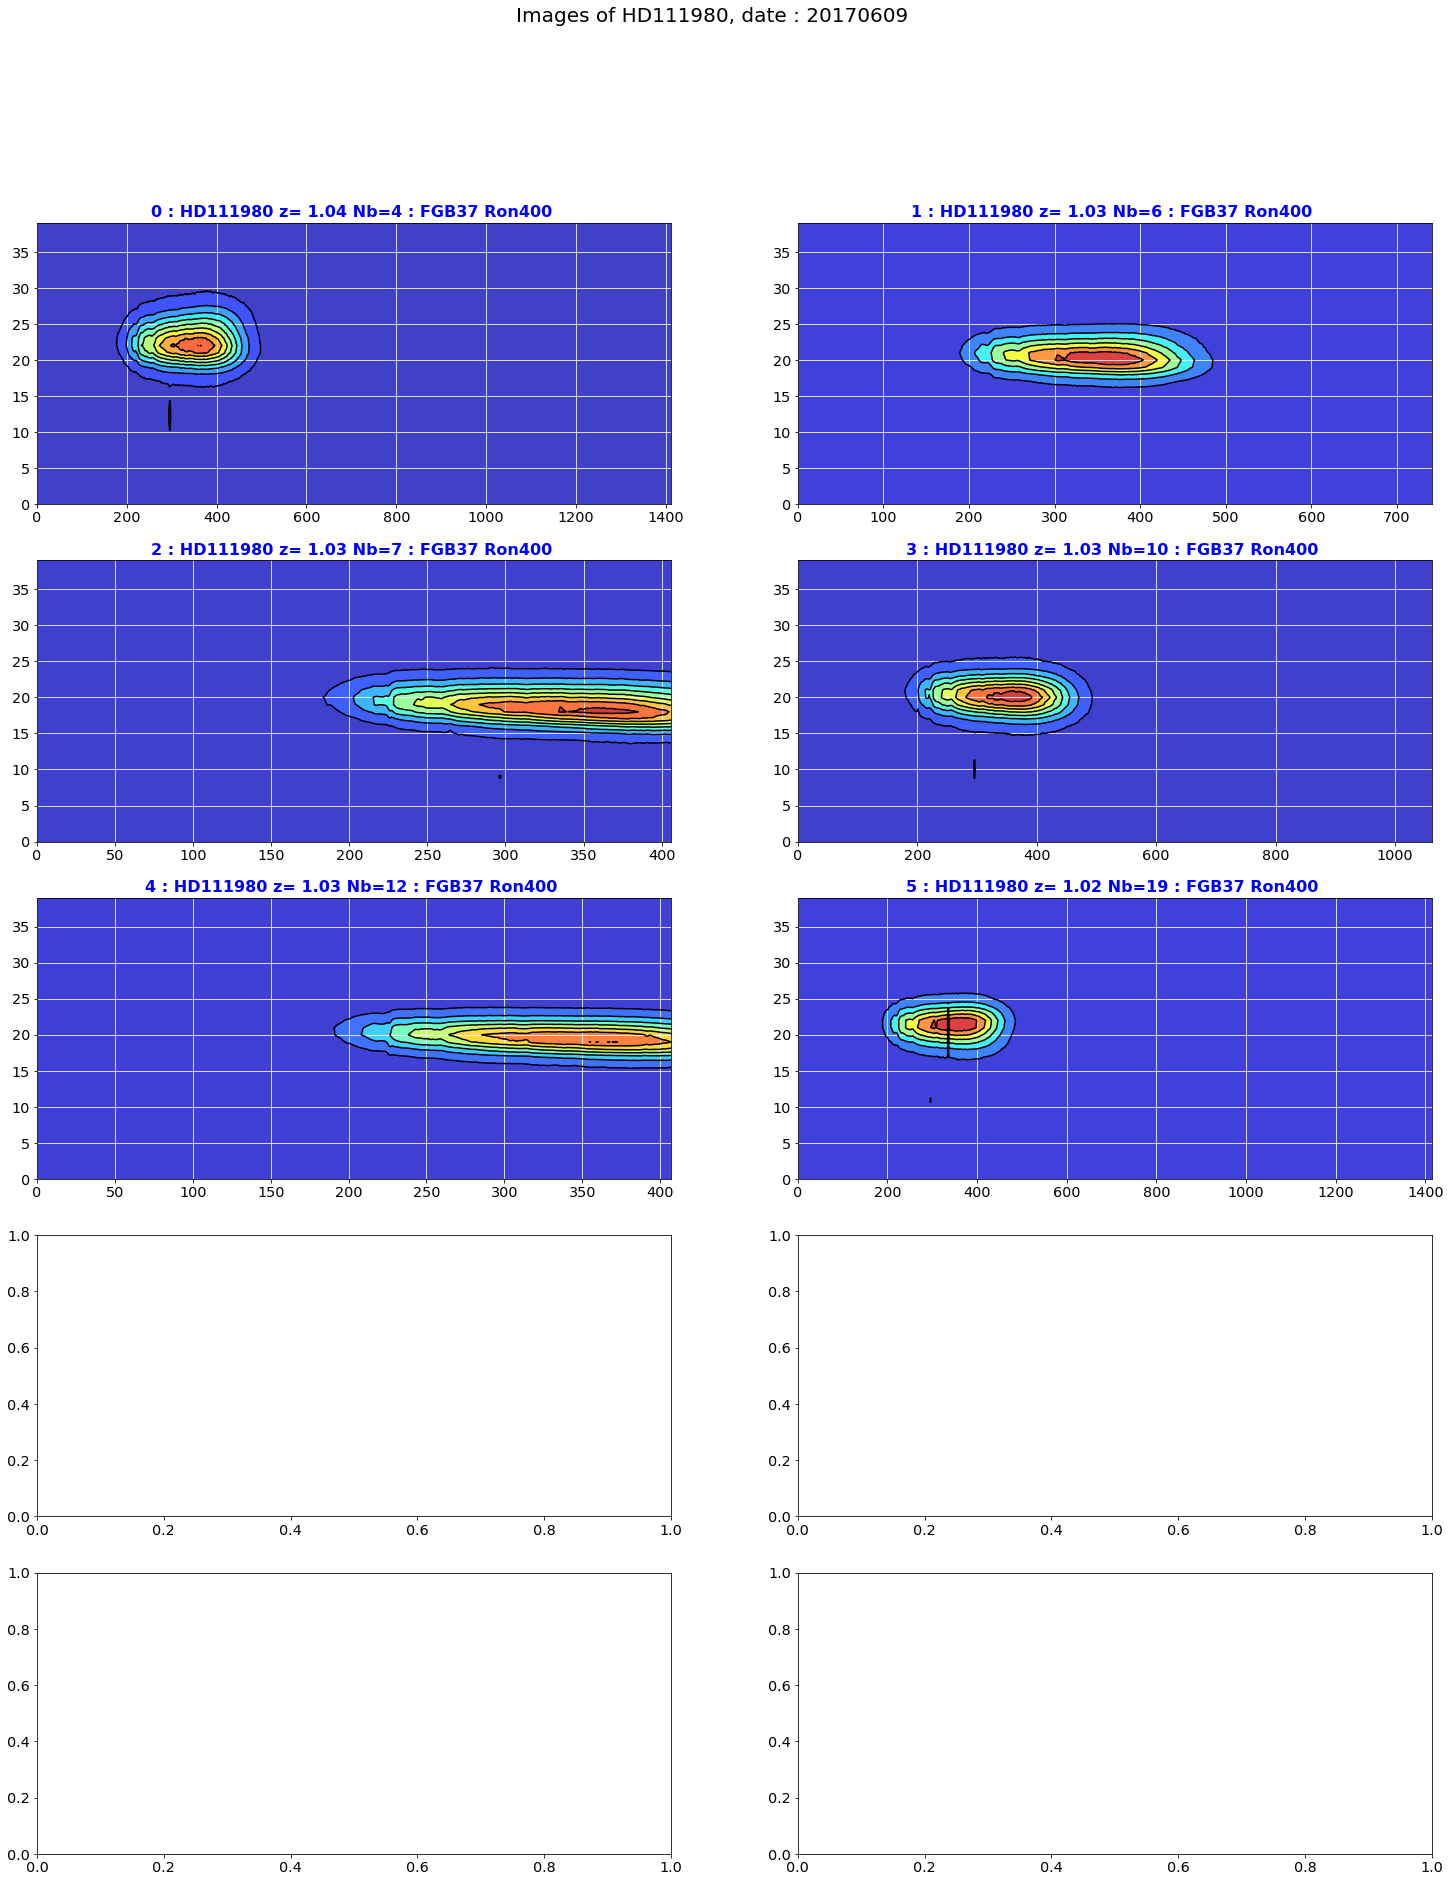

In [62]:
ShowOneOrder_contourinPDF(all_images,all_titles,new_x_star,new_y_star,object_name,all_expo,dir_top_images,all_filt,date,'firstorderright_contour.pdf')

# Show the transverse profile and extract the spectra

- select order + 1
- check the center in Y is correct
- check the selected transverse width is OK

## method 1


- method from Sylvie, based on transverse sum

- Take two lateral band at a distance 40 pixels
- The width of each band is +/- 10 pixels

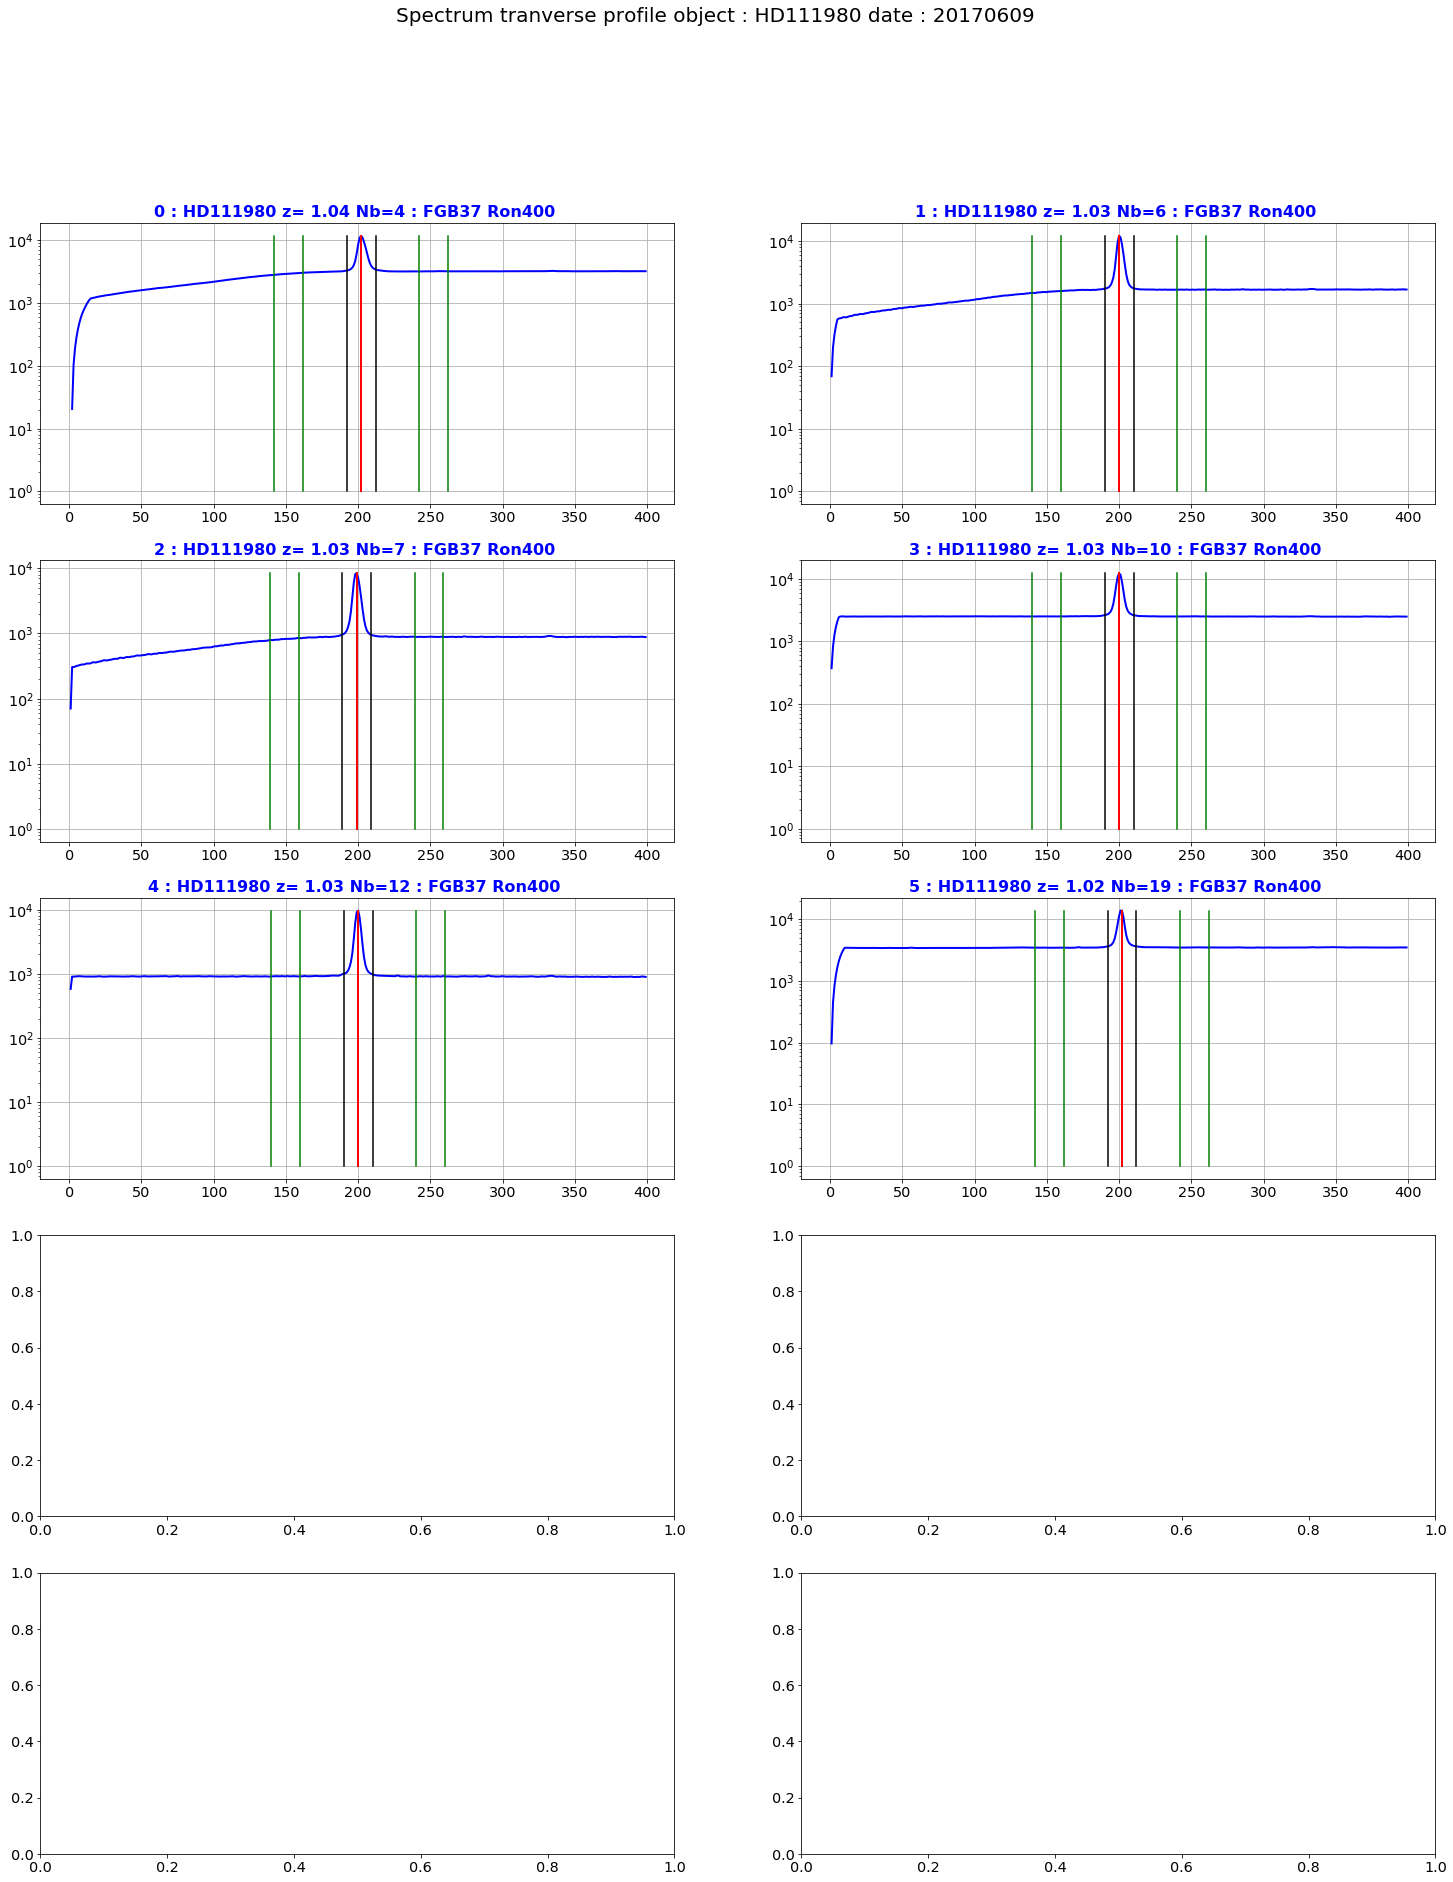

In [63]:
thespectra,thespectraUp,thespectraDown,they0=ShowTransverseProfileinPDF(all_images,new_x_star,all_titles,object_name,all_expo,dir_top_images,all_filt,date,'transverse_profile.pdf')

In [64]:
print they0

[202, 200, 199, 200, 200, 202]


In [65]:
print thespectra[0].shape

(1900,)


## method 2
- method from Jeremy based on transverse mean (median)
- somethibg wrong here

In [66]:
#they02=ShowTransverseProfile(all_images,all_titles,object_name,all_expo,NBIMGPERROW=2,
#                      DeltaX=1000,w=10,ws=[20,30],right_edge=1800,ylim=(1e2,2e7))

In [67]:
#thespectra2,thespectraUp2,thespectraDown2=ExtractSpectra(they0,all_images,all_titles,object_name,all_expo,
#                                                      w=10,ws=[40,10],right_edge=1800)

## Check both backgrounds (up and down)

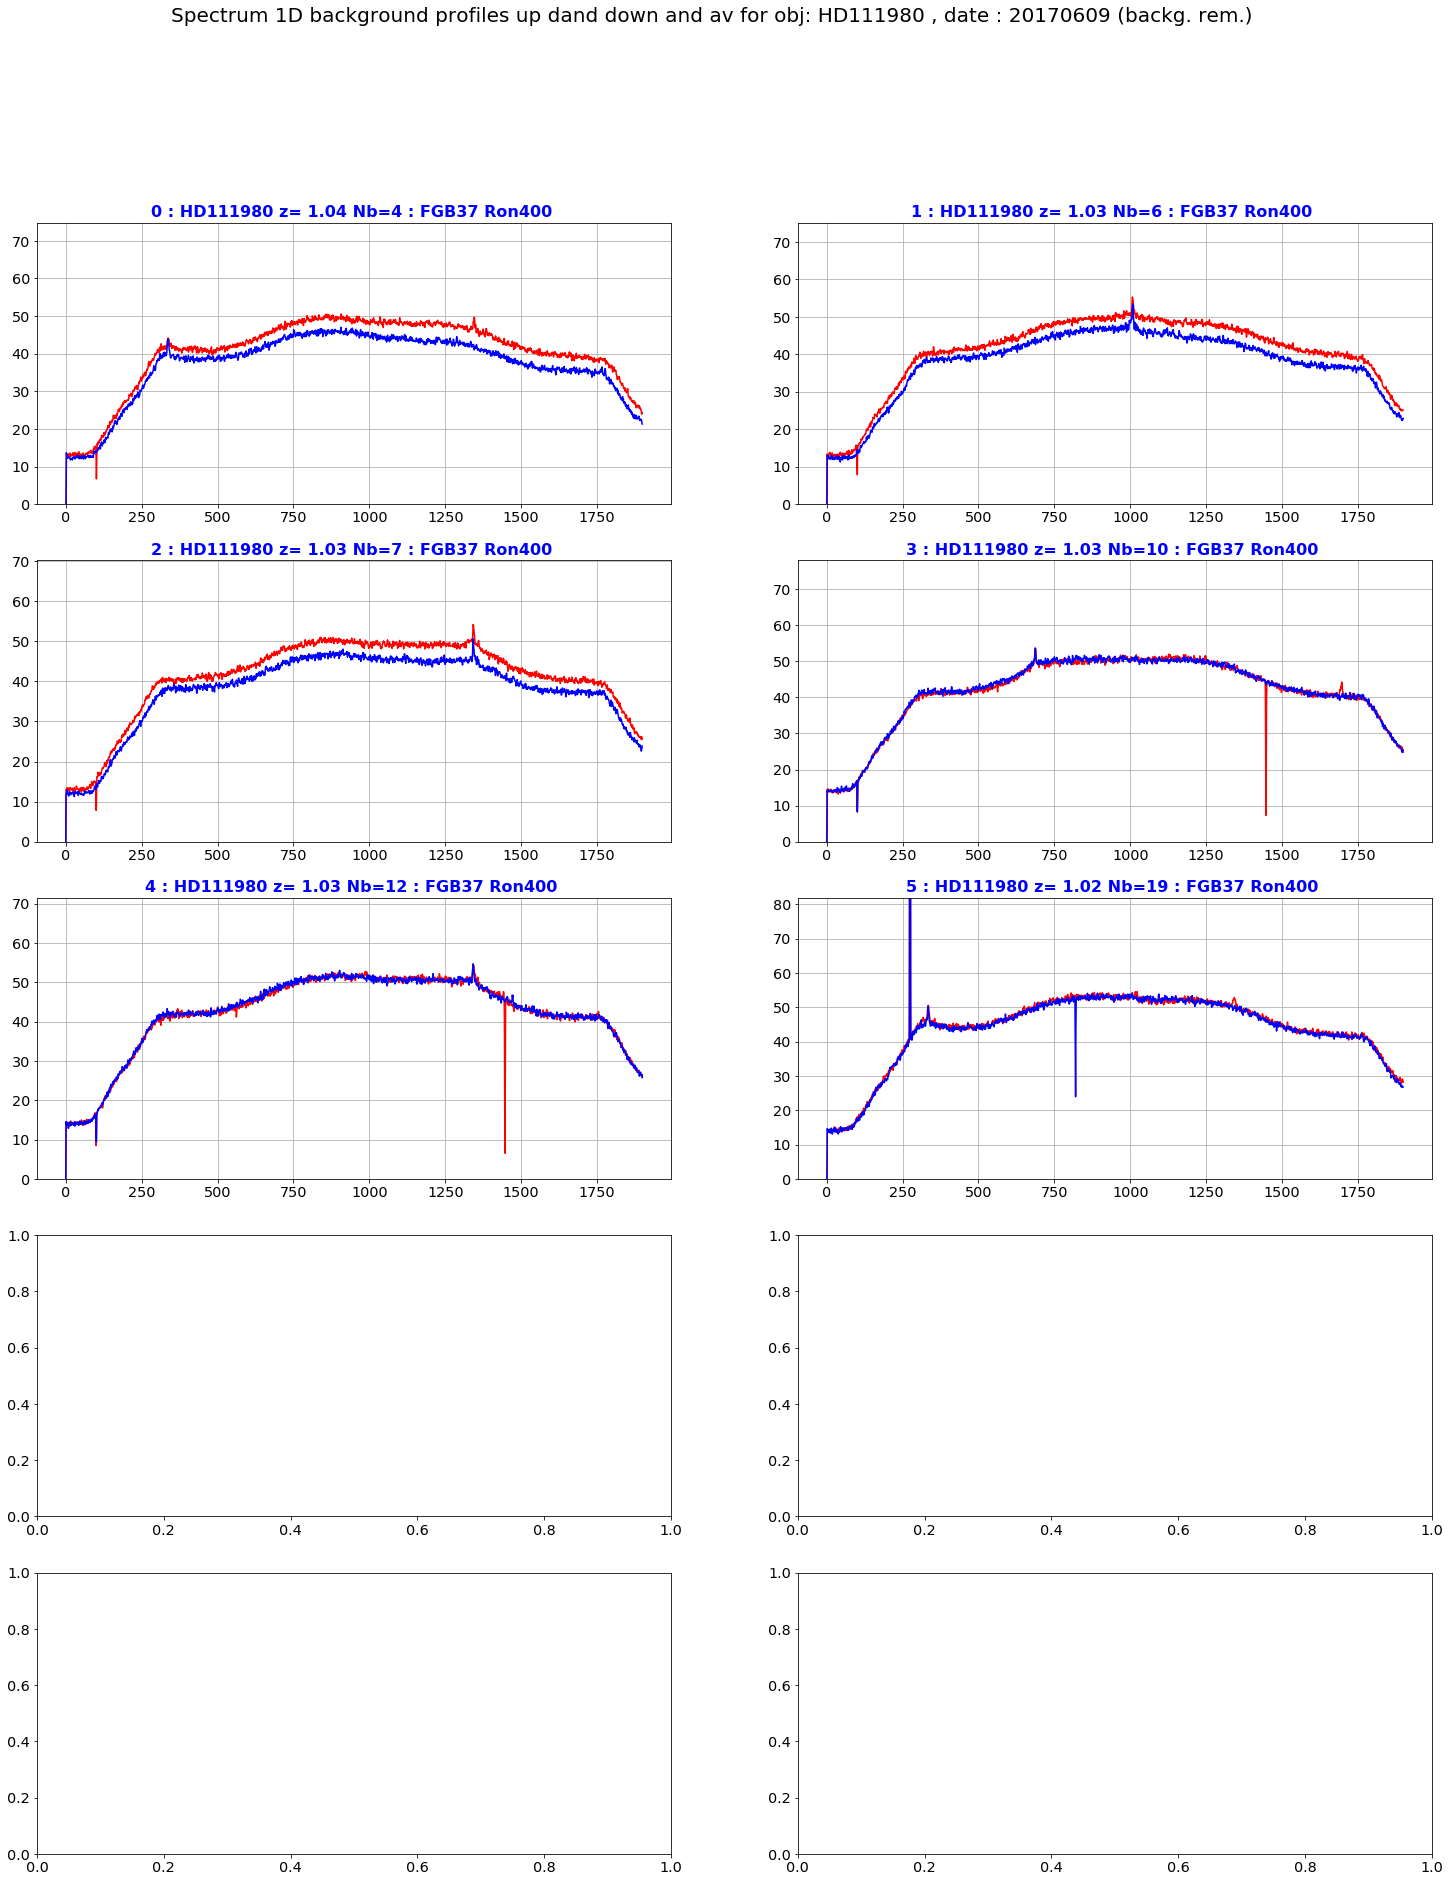

In [68]:
ShowTheBackgroundProfileUpDowninPDF(thespectraUp,thespectraDown,all_titles,object_name,dir_top_images,all_filt,date,'backgroundupdown_profile.pdf')

# Left and Right order

## Right order

In [69]:
#ShowRightOrder(all_images,new_x_star,they0,all_titles,object_name,all_expo,dir_top_images)

## Left order

In [70]:
#ShowLeftOrder(all_images,new_x_star,they0,all_titles,object_name,all_expo,dir_top_images)

## Clean pixels

In [71]:
#Clean_Up2, Clean_Do2,Clean_Av2=CleanBadPixels(thespectraUp2,thespectraDown2) 

In [72]:
Clean_Up, Clean_Do,Clean_Av=CleanBadPixels(thespectraUp,thespectraDown) 

# Show raw spectrum and its background

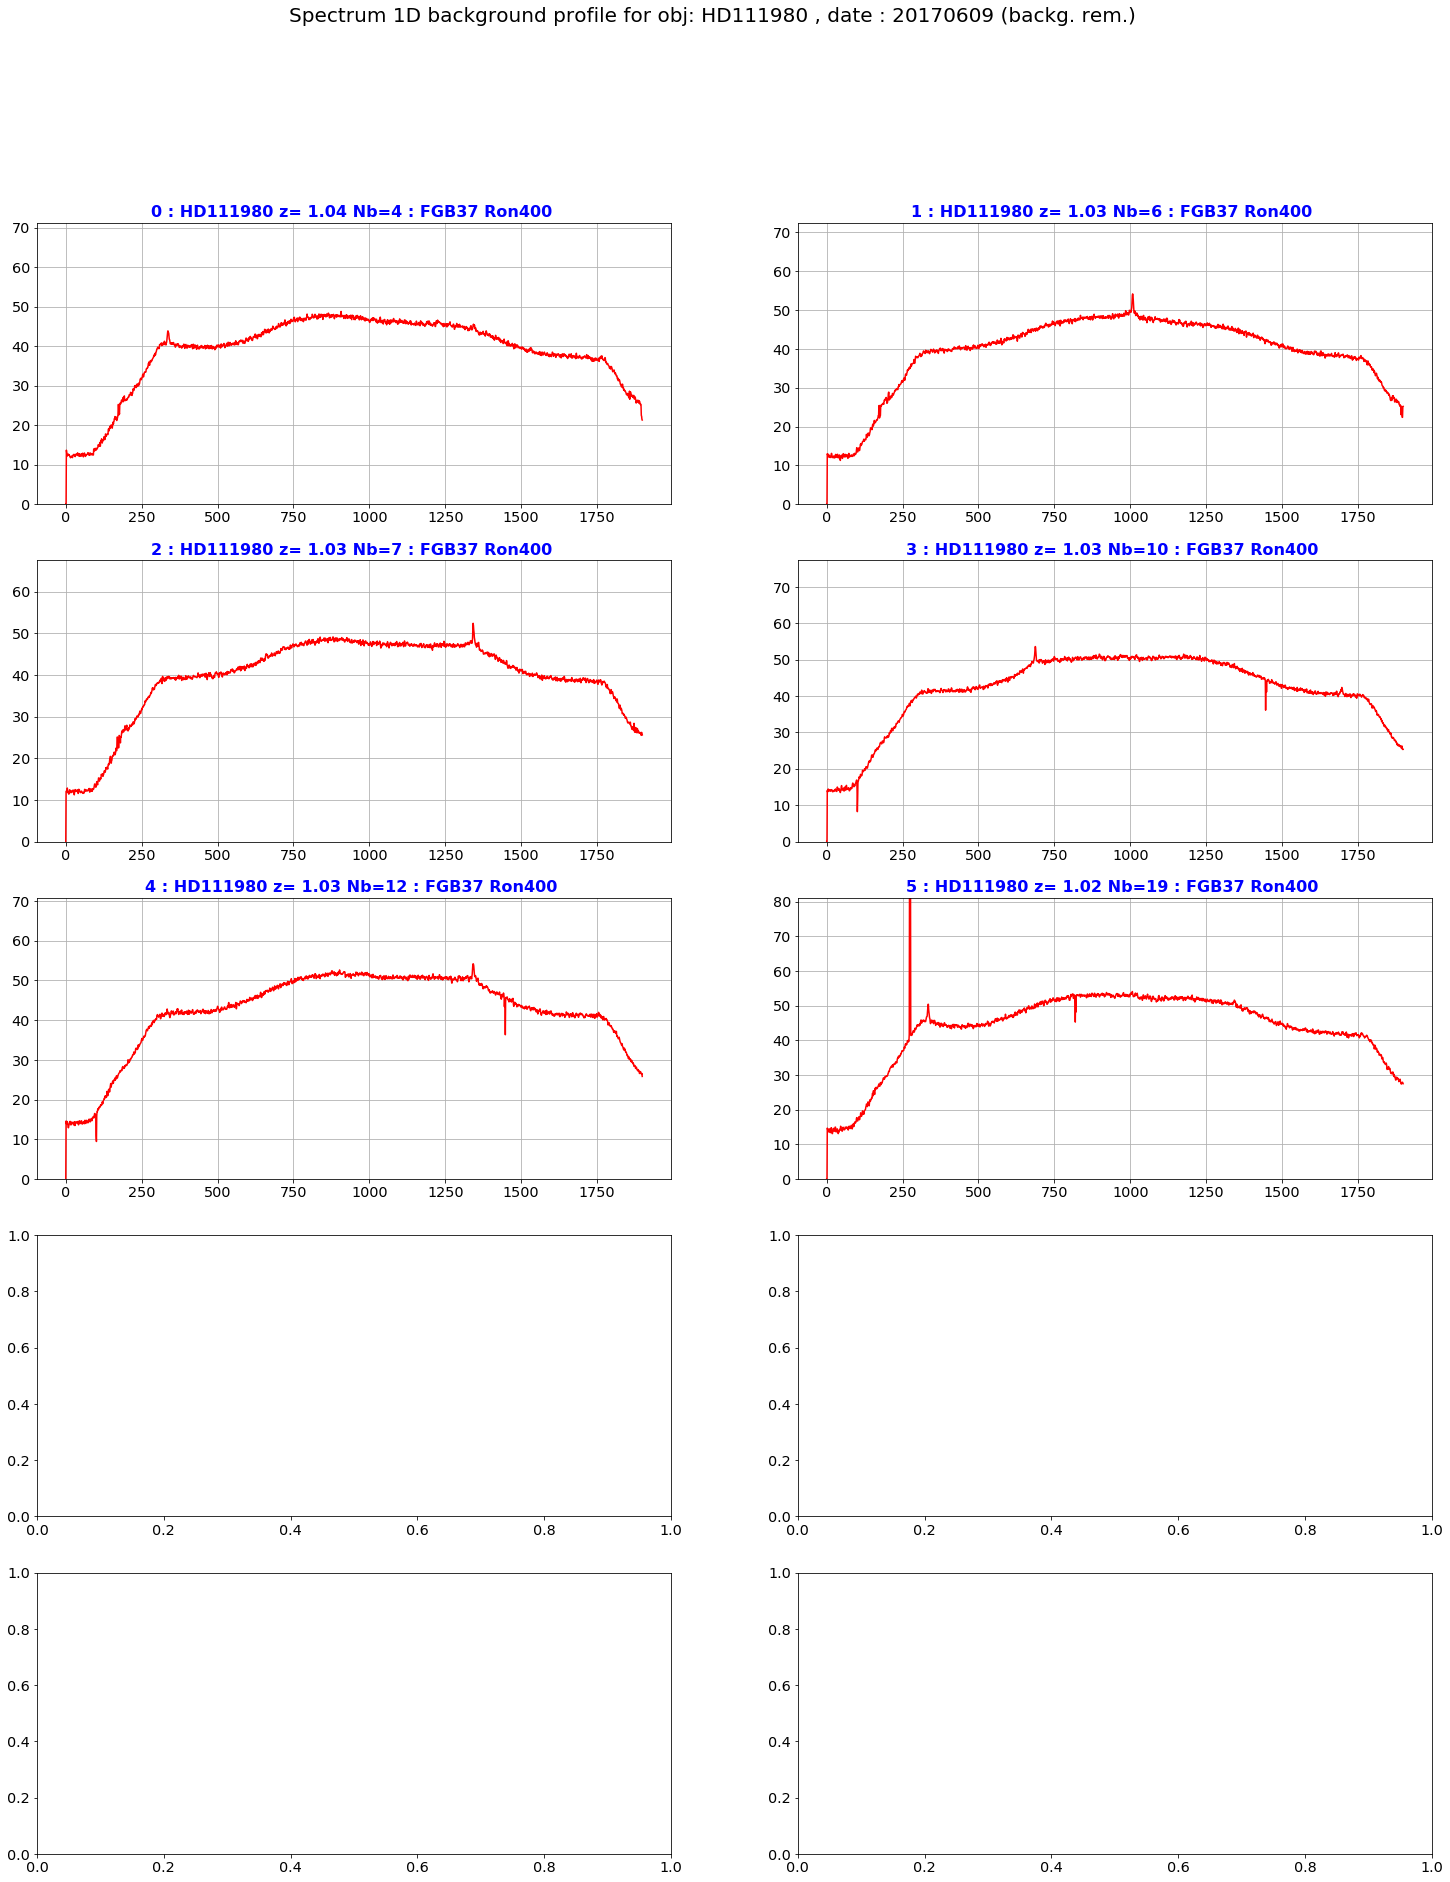

In [73]:
ShowTheBackgroundProfileinPDF(Clean_Av,all_titles,object_name,dir_top_images,all_filt,date,'averbackground_profile.pdf')

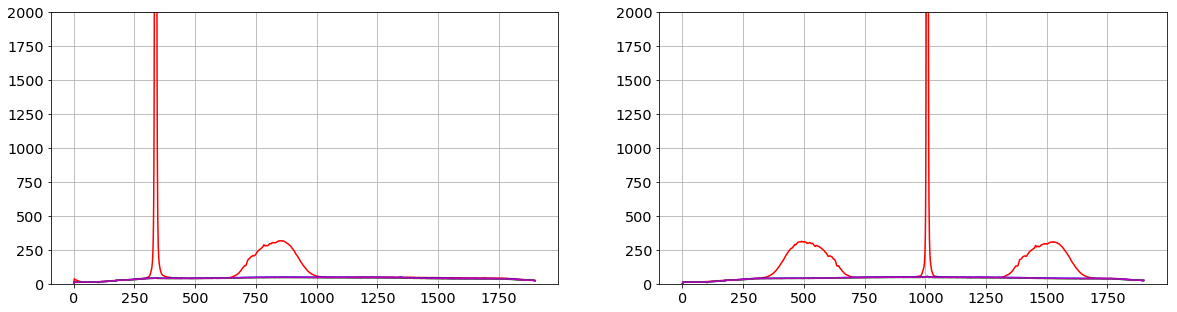

In [74]:
sel=0
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
ax1.plot(thespectra[sel],'r-') 
ax1.plot(Clean_Up[sel],'b-') 
ax1.plot(Clean_Do[sel],'g-')
ax1.plot(Clean_Av[sel],'m-')
ax1.set_ylim(0,2000)
ax1.grid(True)

ax2.plot(thespectra[sel+1],'r-') 
ax2.plot(Clean_Up[sel+1],'b-') 
ax2.plot(Clean_Do[sel+1],'g-')
ax2.plot(Clean_Av[sel+1],'m-')
ax2.set_ylim(0,2000)
ax2.grid(True)


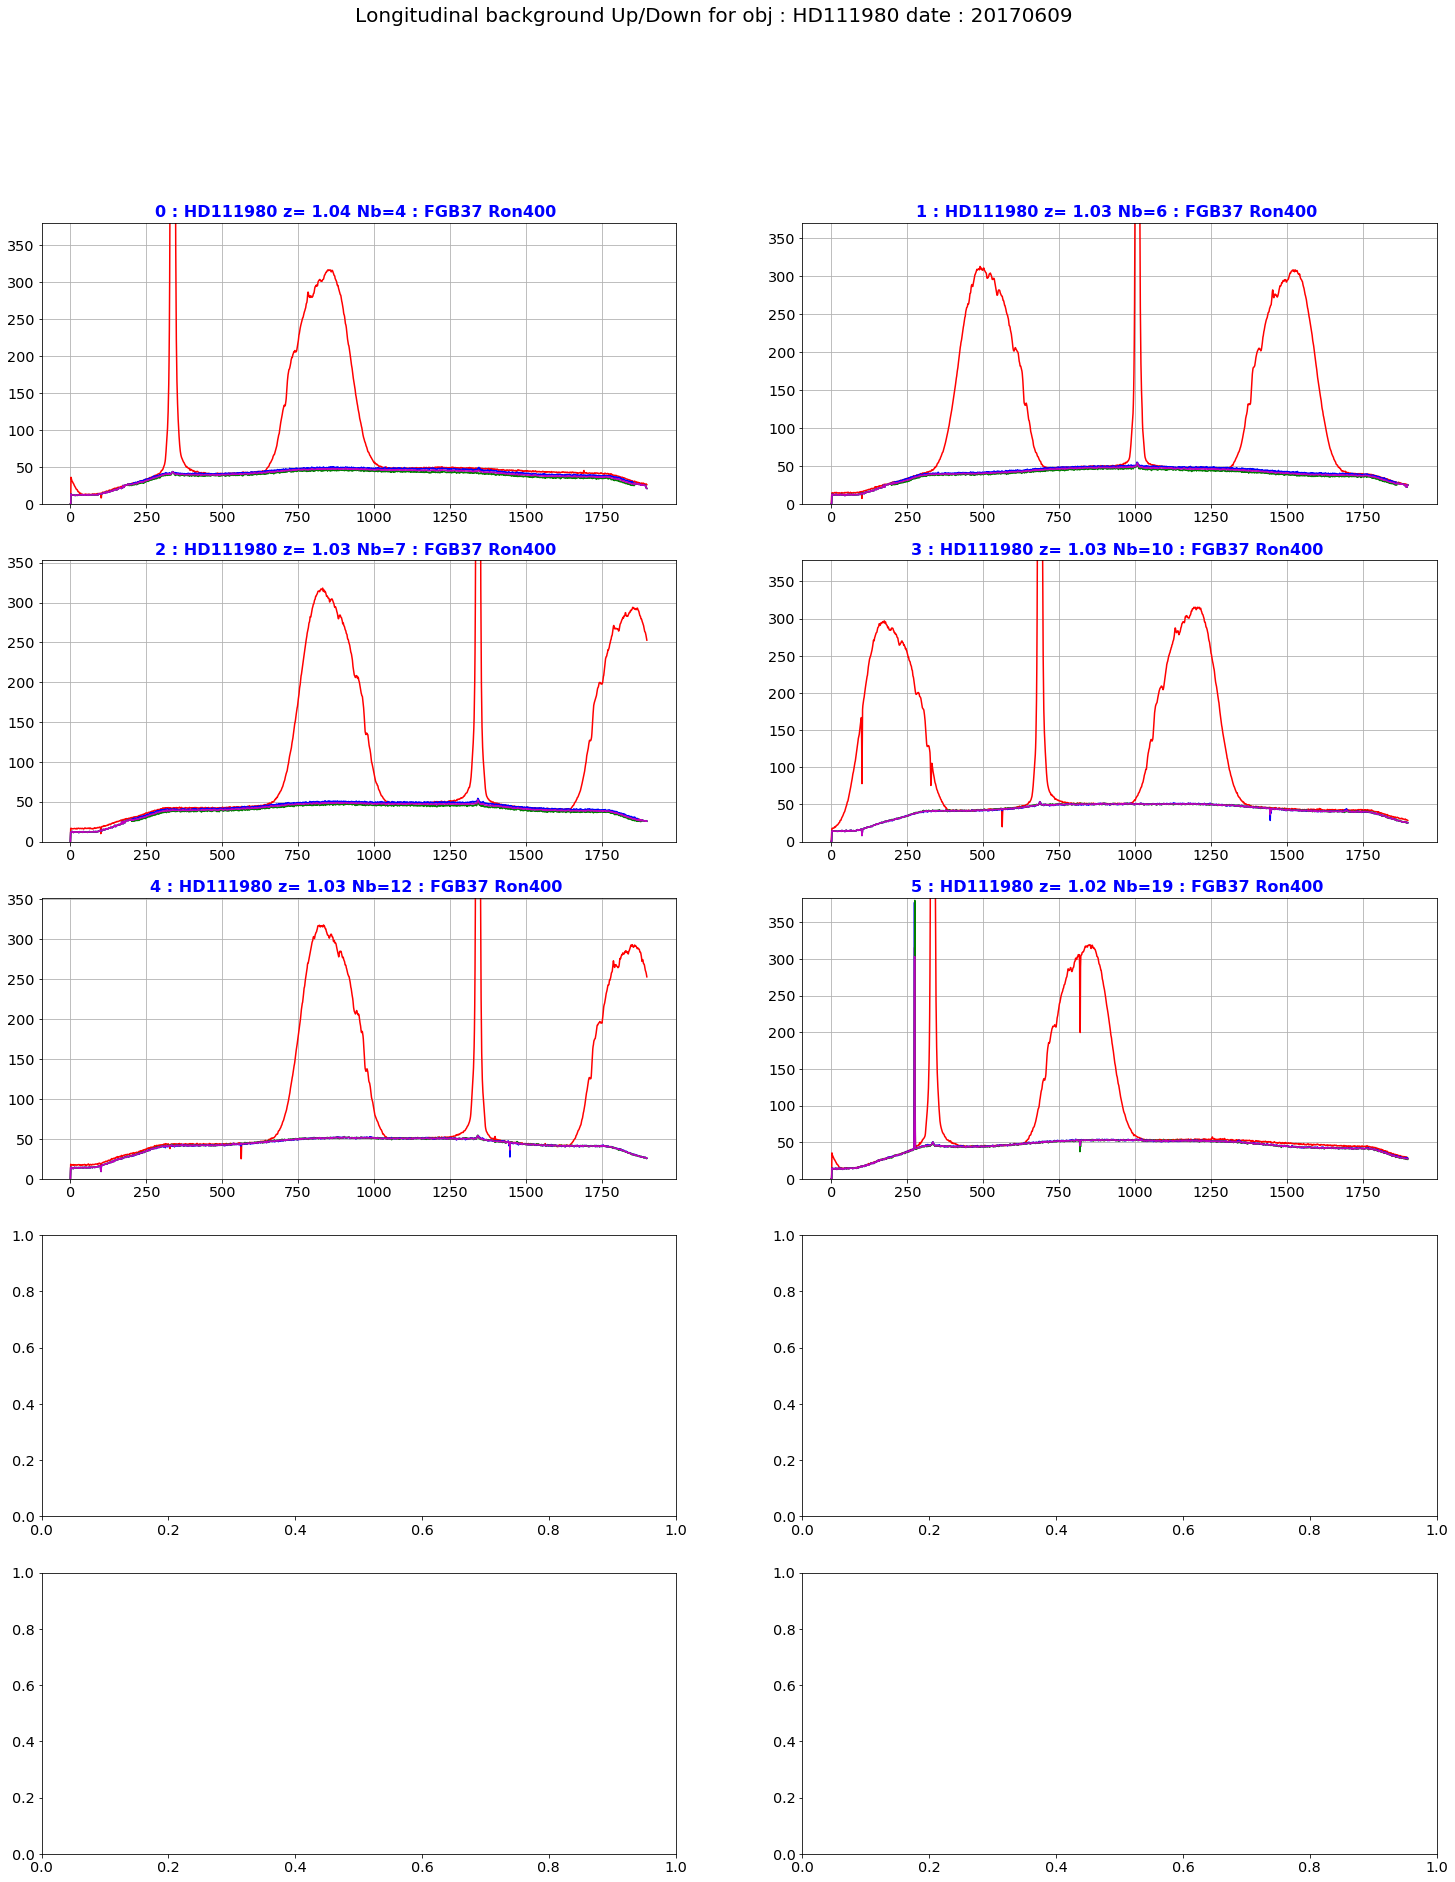

In [75]:
ShowLongitBackgroundinPDF(thespectra,Clean_Up,Clean_Do,Clean_Av,all_titles,object_name,dir_top_images,all_filt,date,'background_longprofile.pdf')

# Correct spectrum from its sky background

In [76]:
thecorrspectra=CorrectSpectrumFromBackground(thespectra,Clean_Av)

## Whole spectra

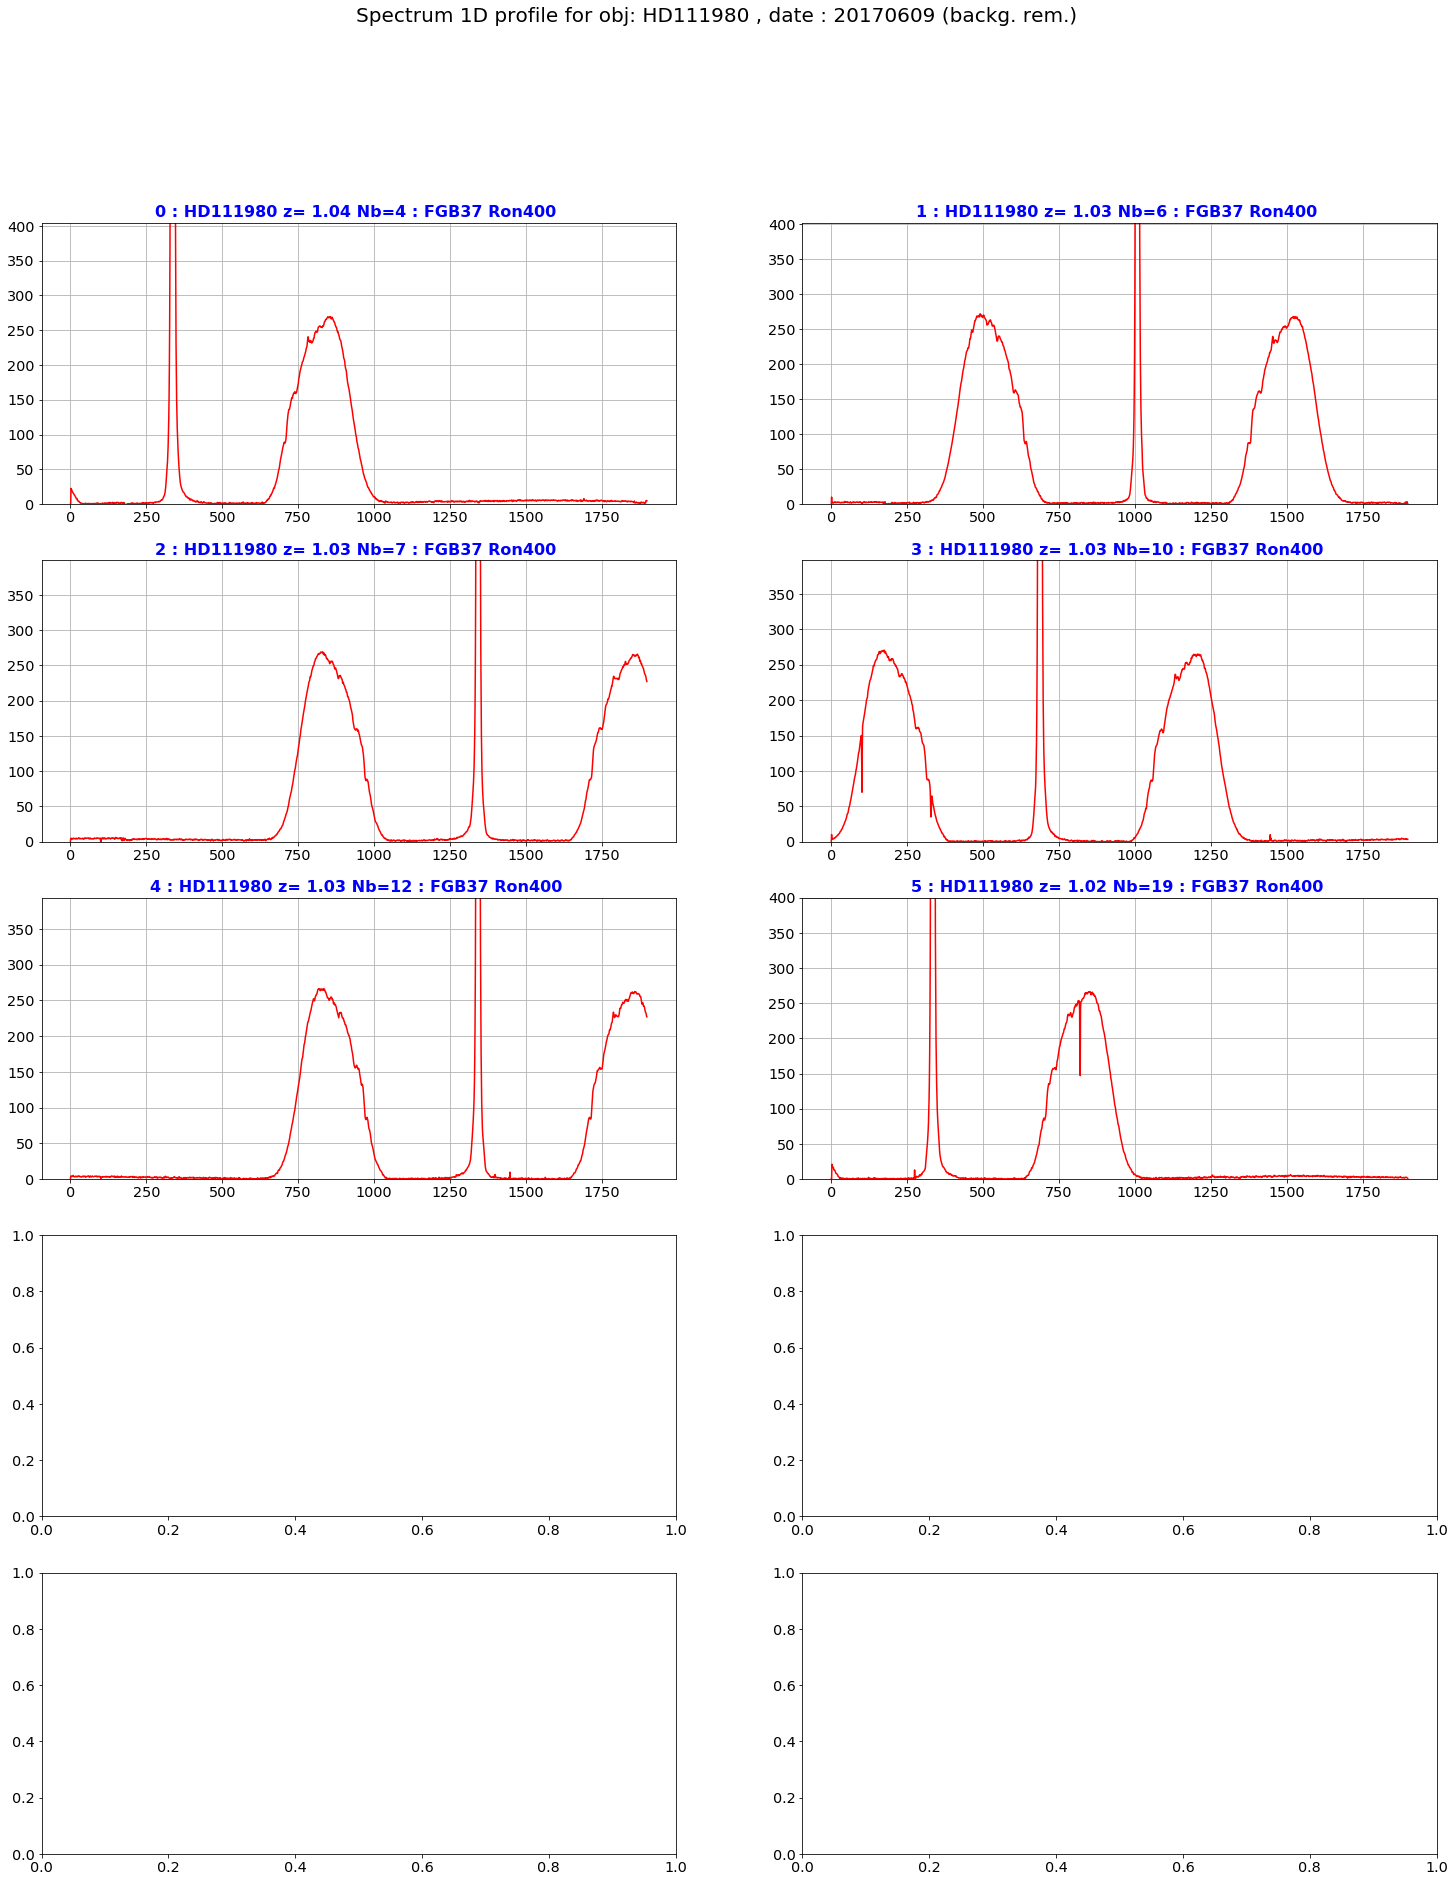

In [77]:
ShowCorrectedSpectrumProfileinPDF(thecorrspectra,all_titles,object_name,dir_top_images,all_filt,date,'correctedspectrum_profile.pdf')

## Right spectra

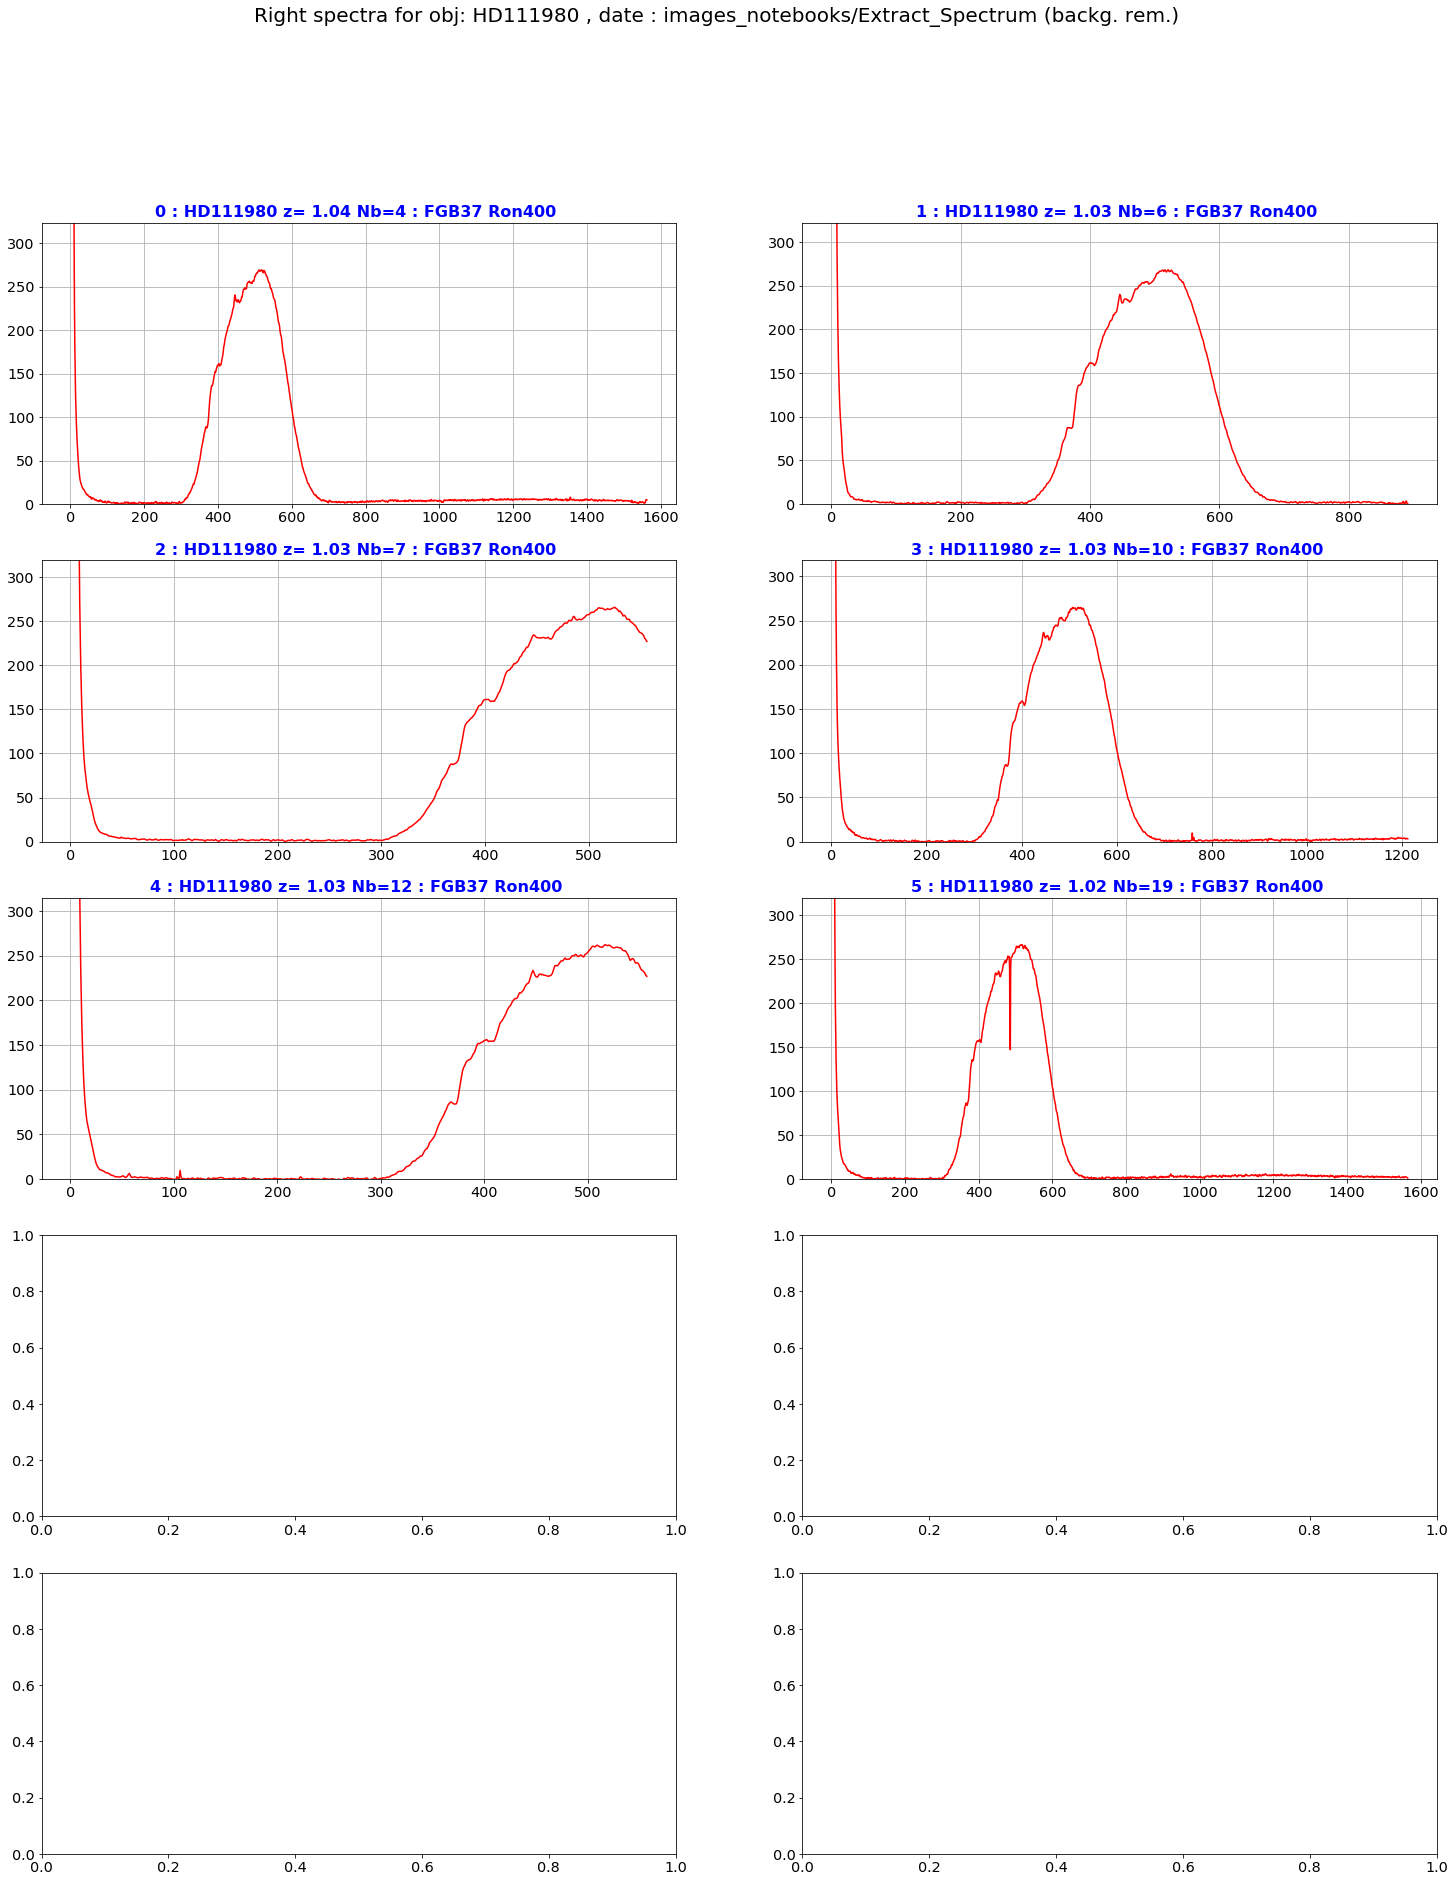

In [78]:
ShowSpectrumRightProfileinPDF(thecorrspectra,new_x_star,all_titles,object_name,dir_top_images,all_filt,dir_top_images,date,'correctedspectrum_rightprofile.pdf')

## Left spectra

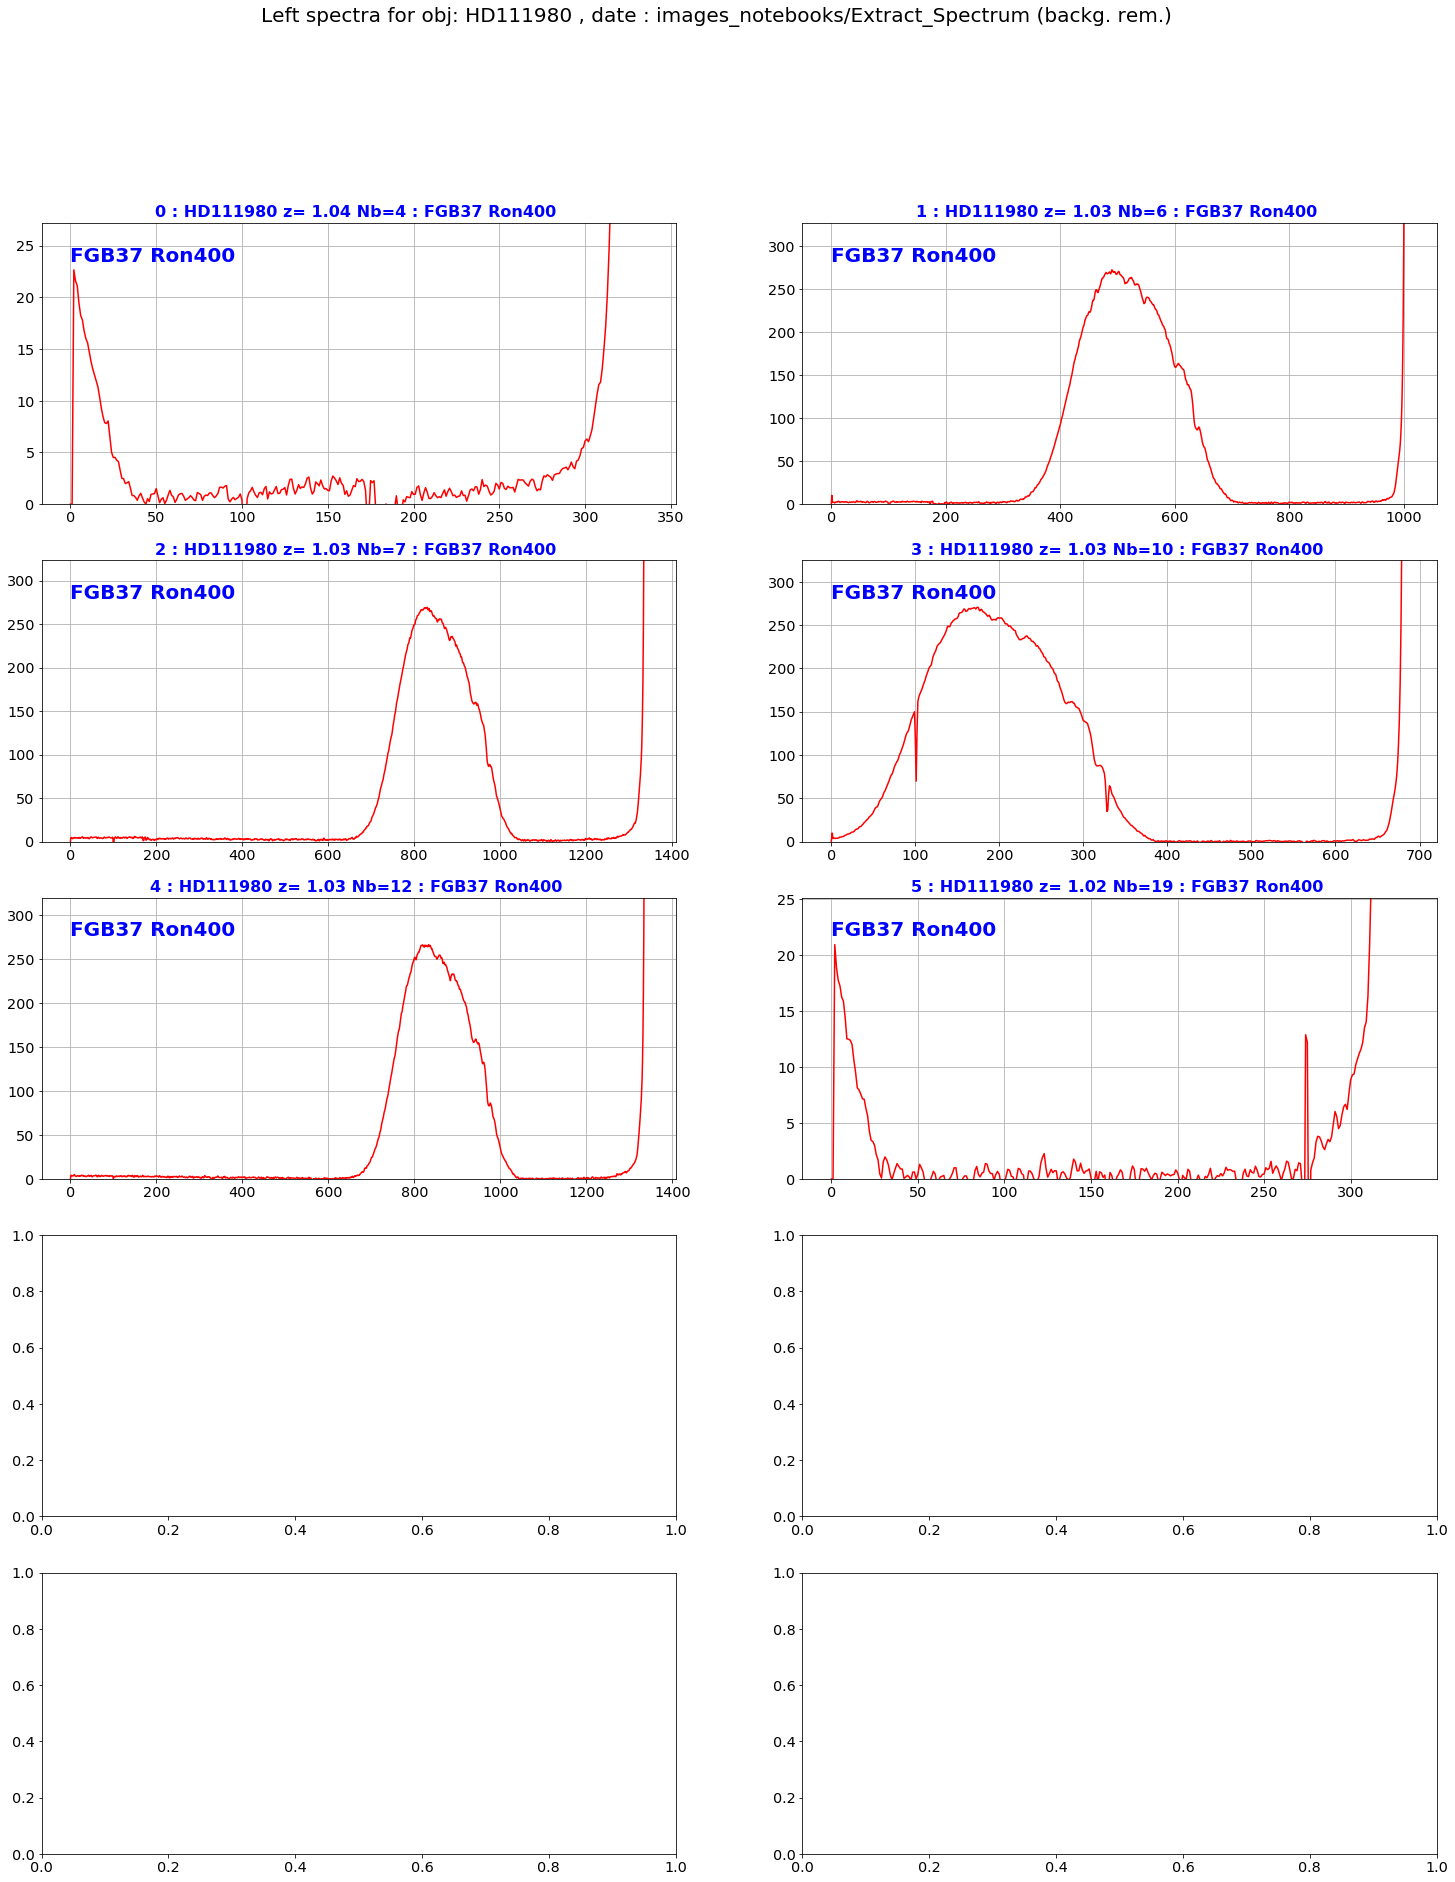

In [79]:
ShowSpectrumLeftProfileinPDF(thecorrspectra,new_x_star,all_titles,object_name,dir_top_images,all_filt,dir_top_images,date,'correctedspectrum_leftprofile.pdf')

# Refine central position


- at least need  the width to guess the error

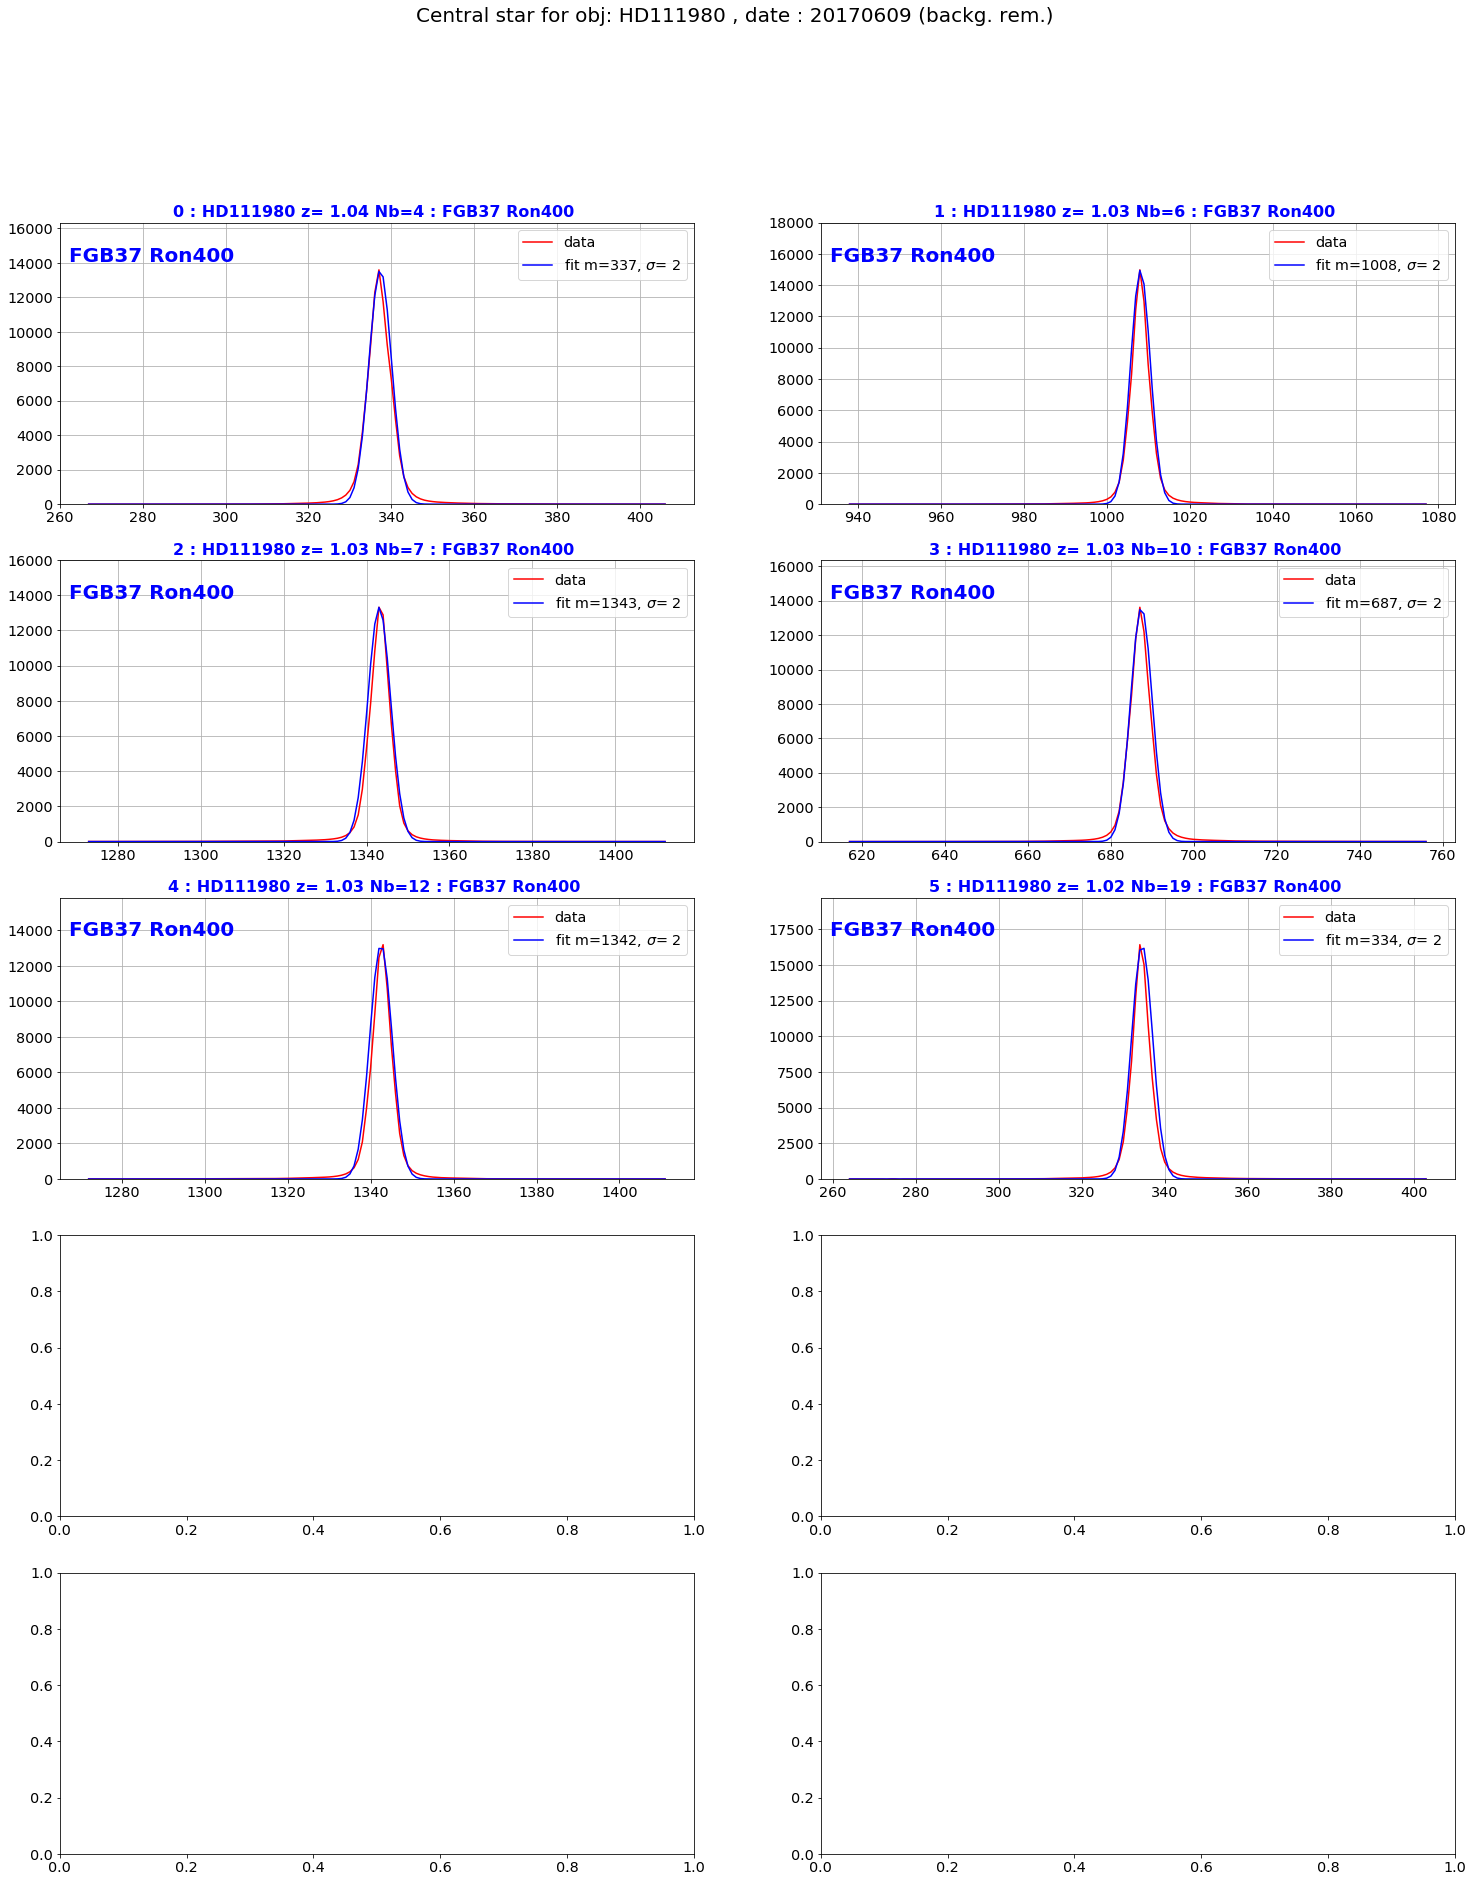

In [80]:
star_indexes_fitmean,star_indexes_fitsig=Find_CentralStar_positioninPDF(thecorrspectra,new_x_star,all_titles,object_name,dir_top_images,all_filt,date,'correctedspectrum_starprofile.pdf')

# Split spectrum

## Split Spectrum with background subtracted

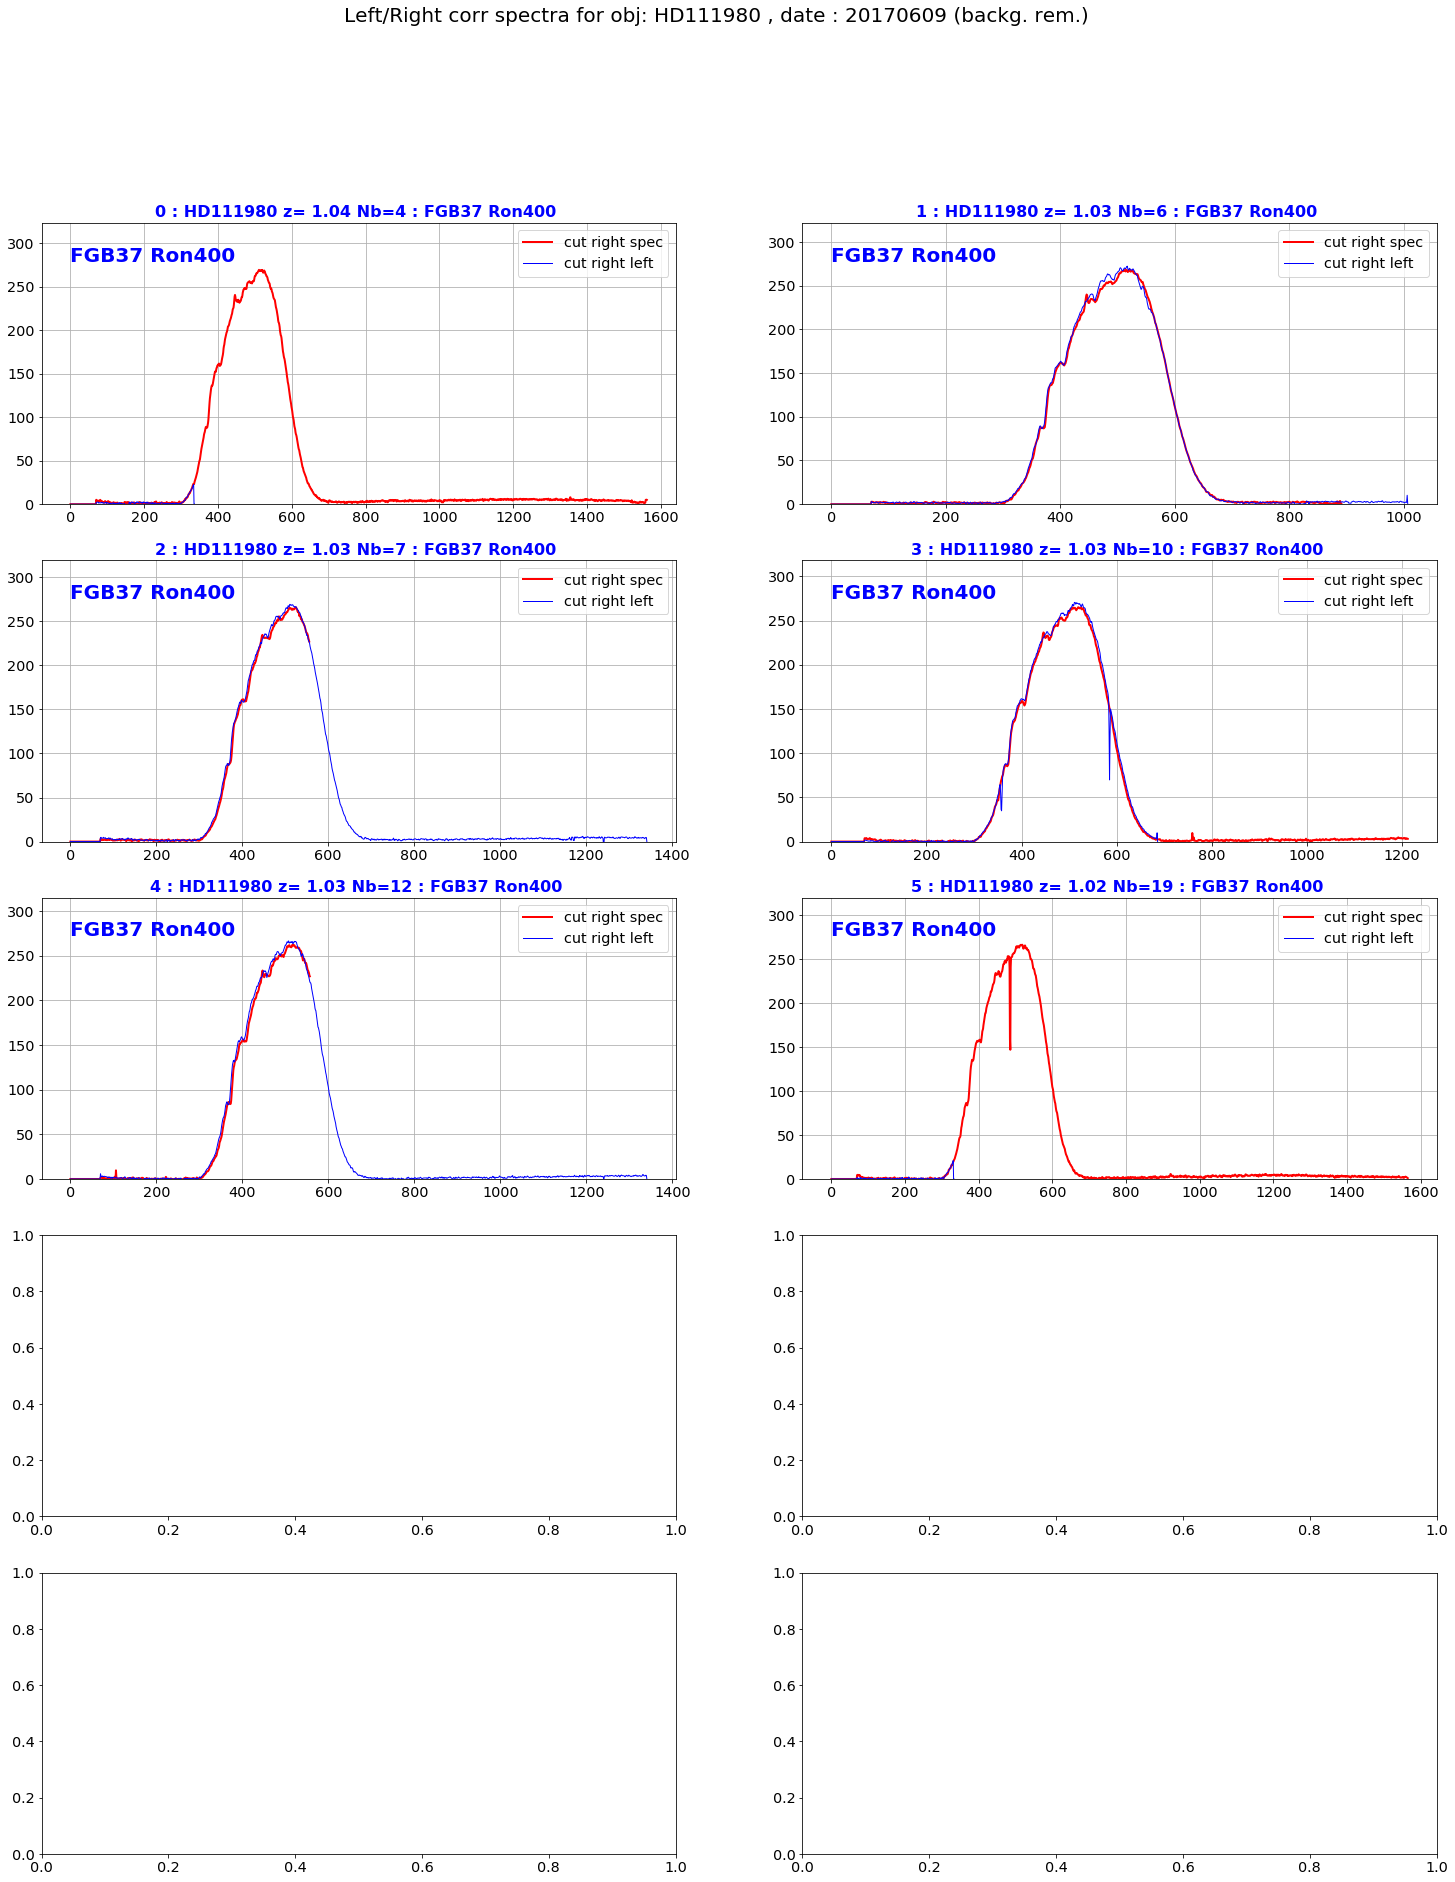

In [81]:
spectra_left_final,spectra_right_final=SplitSpectrumProfileSimpleinPDF(thecorrspectra,star_indexes_fitmean,all_titles,object_name,dir_top_images,all_filt,date,'split_spectra_nobg.pdf')

## Split background with no background subtracted

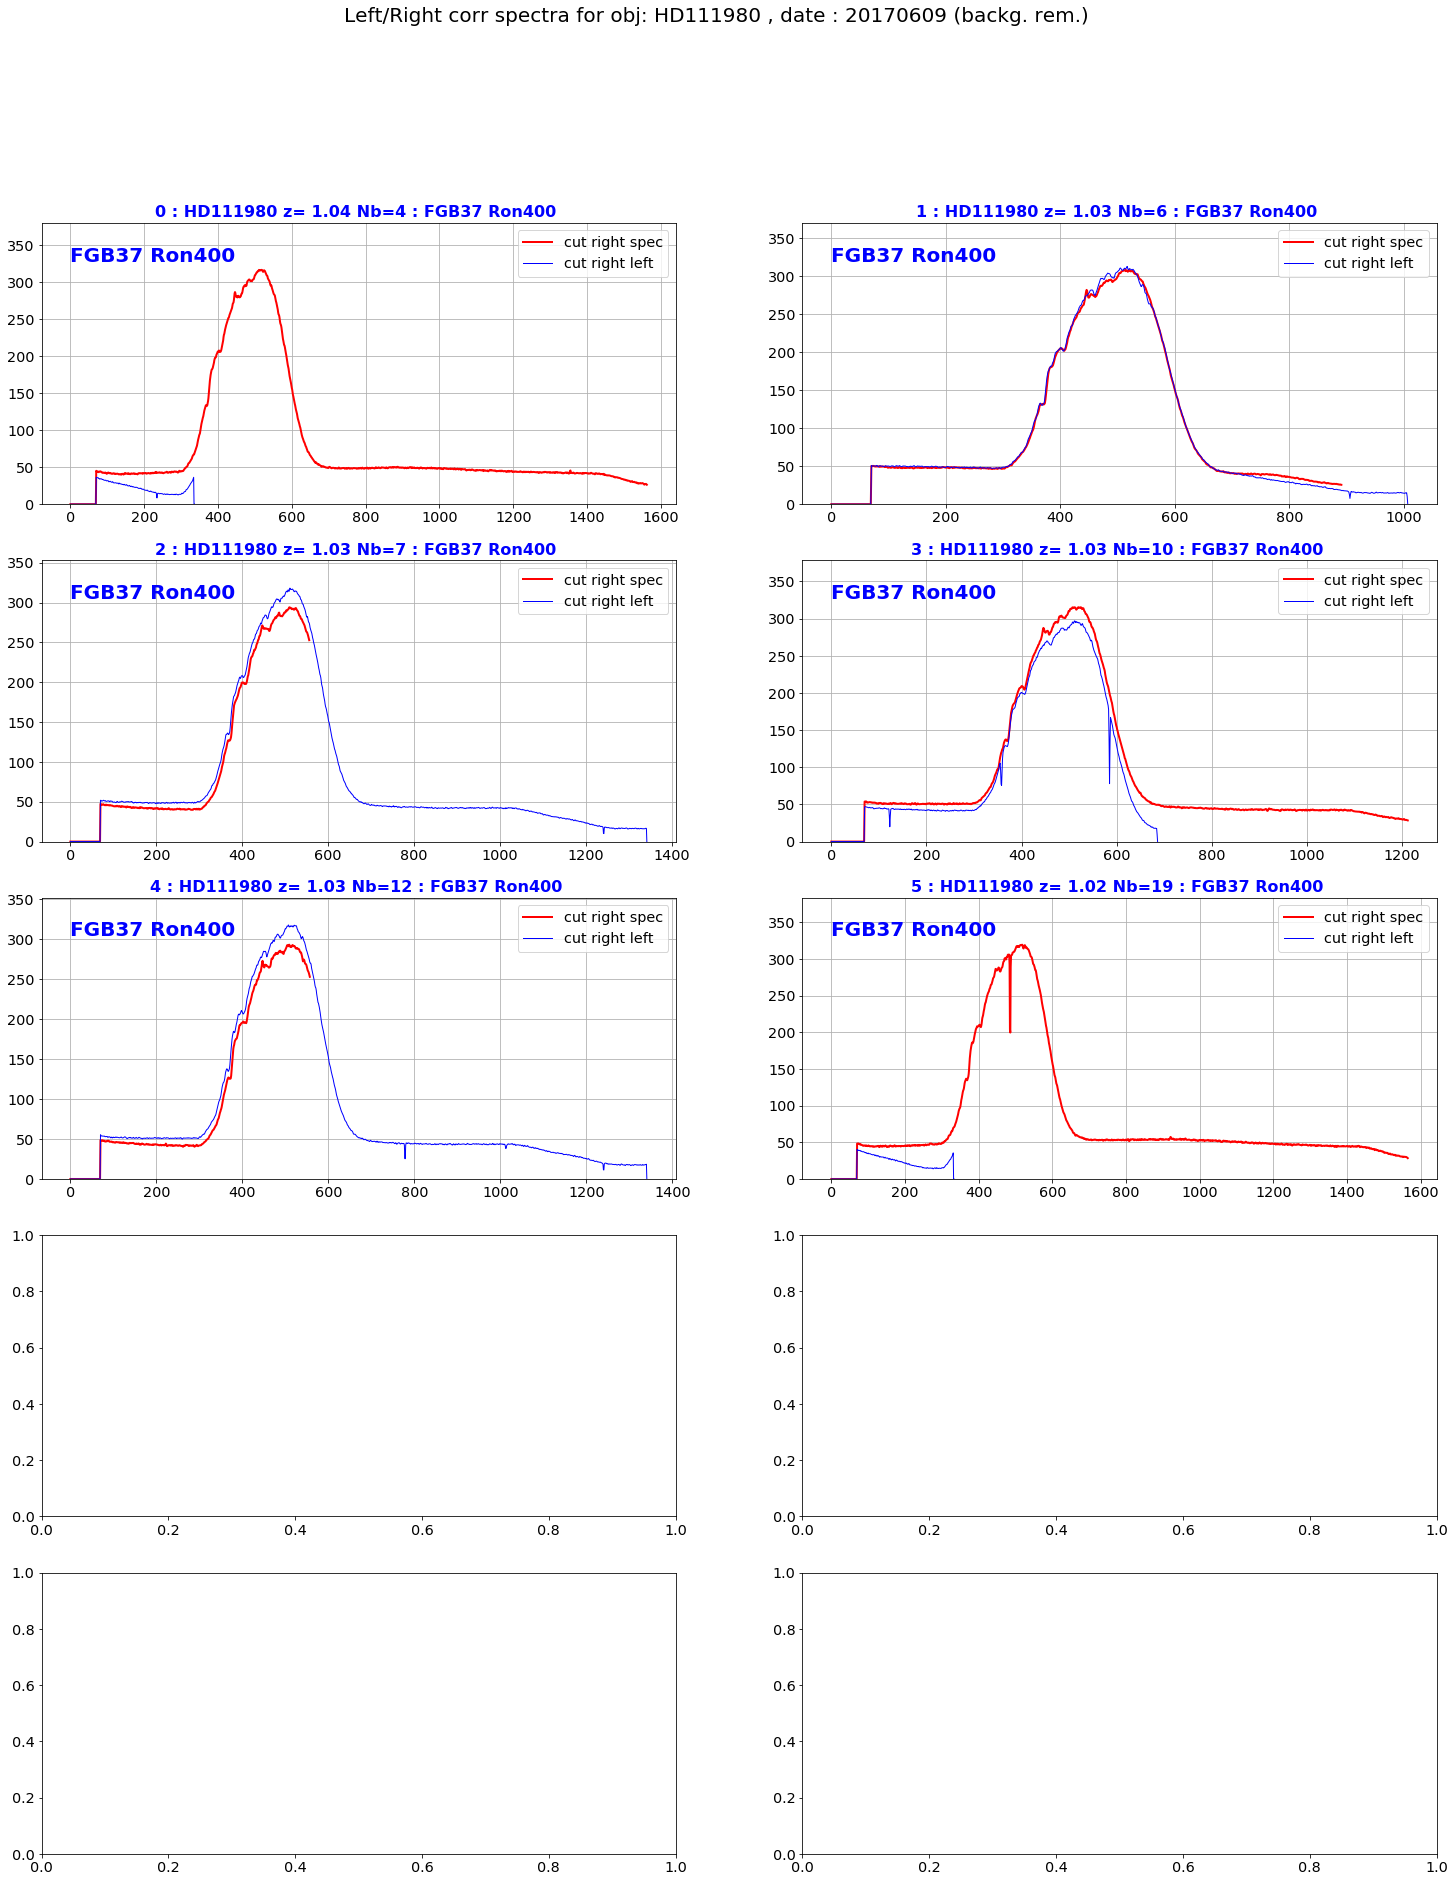

In [82]:
totalspectra_left_final,totalspectra_right_final=SplitSpectrumProfileSimpleinPDF(thespectra,new_x_star,all_titles,object_name,dir_top_images,all_filt,date,'split_spectra_andbg.pdf')

# Superpositions of Spectra

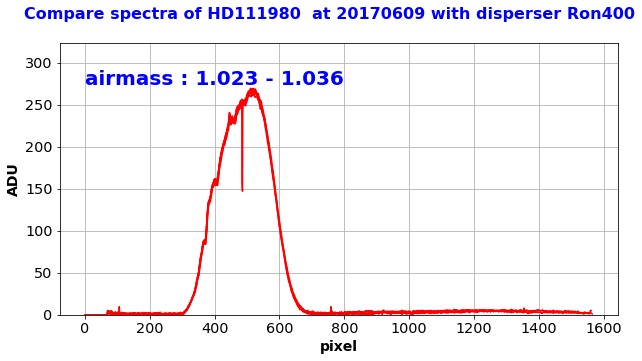

In [83]:
if filt0_idx.shape[0] >0:
    CompareSpectrumProfileinPDF(spectra_right_final,all_airmass,all_titles,object_name,dir_top_images,all_filt,date,'comparespec_ron400.pdf','Ron400',filt0_idx)

In [84]:
if filt1_idx.shape[0] >0:
    CompareSpectrumProfileinPDF(spectra_right_final,all_airmass,all_titles,object_name,dir_top_images,all_filt,date,'comparespec_thor300.pdf','Thor300',filt1_idx)

In [85]:
if filt2_idx.shape[0] >0:
    CompareSpectrumProfileinPDF(spectra_right_final,all_airmass,all_titles,object_name,dir_top_images,all_filt,date,'comparespec_holophp.pdf','HoloPhP',filt2_idx)

In [86]:
if filt3_idx.shape[0] >0:
    CompareSpectrumProfileinPDF(spectra_right_final,all_airmass,all_titles,object_name,dir_top_images,all_filt,date,'comparespec_holophag.pdf','HoloPhAg',filt3_idx)

In [87]:
if filt4_idx.shape[0] >0:
    CompareSpectrumProfileinPDF(spectra_right_final,all_airmass,all_titles,object_name,dir_top_images,all_filt,date,'comparespec_holoamag.pdf','HoloAmAg',filt4_idx)

In [88]:
if filt5_idx.shape[0] >0:
    CompareSpectrumProfileinPDF(spectra_right_final,all_airmass,all_titles,object_name,dir_top_images,all_filt,date,'comparespec_ron200.pdf','Ron200',filt5_idx)

## Save results

In [89]:
newfullfilenames=[]
for idx,file in np.ndenumerate(sorted_files):
    short_infilename=file.split("/")[2]
    short_partfilename=re.findall('^rotimg_(.*)',short_infilename)
    short_outfilename='finalSpectra_'+short_partfilename[0]
    newfullfilename=os.path.join(outputdir,short_outfilename)
    newfullfilenames.append(newfullfilename)

In [90]:
newfullfilenames

['./spectrum_fitsspec/finalSpectra_20170609_004.fits',
 './spectrum_fitsspec/finalSpectra_20170609_006.fits',
 './spectrum_fitsspec/finalSpectra_20170609_007.fits',
 './spectrum_fitsspec/finalSpectra_20170609_010.fits',
 './spectrum_fitsspec/finalSpectra_20170609_012.fits',
 './spectrum_fitsspec/finalSpectra_20170609_019.fits']

### Save outputfilename

In [91]:
#
#  New fashion to save a binary table outside the primary header
#
for idx,file in np.ndenumerate(newfullfilenames):
    primhdu = fits.PrimaryHDU(header=all_header[idx[0]])   # make an primary HDU without data
    
    col1=fits.Column(name='RawLeftSpec',format='E',array=spectra_left_final[idx[0]])
    col2=fits.Column(name='RawRightSpec',format='E',array=spectra_right_final[idx[0]])
    col3=fits.Column(name='TotLeftSpec',format='E',array=totalspectra_left_final[idx[0]])
    col4=fits.Column(name='TotRightSpec',format='E',array=totalspectra_right_final[idx[0]])
    cols=fits.ColDefs([col1,col2,col3,col4])
    
    tbhdu = fits.BinTableHDU.from_columns(cols)     # new binary table HDU
    thdulist = fits.HDUList([primhdu, tbhdu])
    
    thdulist.writeto(file,overwrite=True)

In [92]:
!ls -l ./spectrum_fitsspec

total 456
-rw-r--r--  1 dagoret  LAL\Utilisateurs du domaine  40320 Oct 11 09:51 finalSpectra_20170609_004.fits
-rw-r--r--  1 dagoret  LAL\Utilisateurs du domaine  31680 Oct 11 09:51 finalSpectra_20170609_006.fits
-rw-r--r--  1 dagoret  LAL\Utilisateurs du domaine  37440 Oct 11 09:51 finalSpectra_20170609_007.fits
-rw-r--r--  1 dagoret  LAL\Utilisateurs du domaine  34560 Oct 11 09:51 finalSpectra_20170609_010.fits
-rw-r--r--  1 dagoret  LAL\Utilisateurs du domaine  37440 Oct 11 09:51 finalSpectra_20170609_012.fits
-rw-r--r--  1 dagoret  LAL\Utilisateurs du domaine  40320 Oct 11 09:51 finalSpectra_20170609_019.fits
